In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy import stats

import warnings
warnings.simplefilter("ignore")

sns.set_theme(style='darkgrid')

f2 = {"family":"cambria","color":"g","size":50}
f3  = {"family":"cambria","color":"k","size":40}
f1 = {"family":"cambria","color":"r","size":30}

from sklearn.linear_model import LinearRegression,Lasso, LogisticRegression  #  For regression in Machine Learning
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler

C:\ProgramData\Anaconda3\envs\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1 = pd.read_csv(r"C:\Users\Sinha Rahul\Documents\Superstore csv.csv")

In [3]:
df1

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


# Display Top 10 row in dataset

In [4]:
df1.head(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,Medium,2011
6,CA-2011-1510,2/1/2011,6/1/2011,Standard Class,Magdelene Morse,Consumer,Ontario,Canada,Canada,Canada,...,Technology,Machines,"Okidata Inkjet, Wireless",314,1,0.0,3.120,24.10,Medium,2011
7,IN-2011-79397,3/1/2011,3/1/2011,Same Day,Kean Nguyen,Corporate,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Appliances,"Hoover Microwave, White",276,1,0.1,110.412,125.32,Critical,2011
8,ID-2011-80230,3/1/2011,9/1/2011,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912,4,0.4,-319.464,107.10,Low,2011
9,IZ-2011-4680,3/1/2011,7/1/2011,Standard Class,Lindsay Williams,Corporate,Ninawa,Iraq,EMEA,EMEA,...,Furniture,Chairs,"Novimex Swivel Stool, Set of Two",667,4,0.0,253.320,81.26,High,2011


# Display tail 10 row in dataset

In [5]:
df1.tail(10)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51280,TZ-2014-8220,31-12-2014,6/1/2015,Standard Class,Christine Kargatis,Home Office,Dar Es Salaam,Tanzania,Africa,Africa,...,Office Supplies,Labels,"Harbour Creations Removable Labels, Adjustable",50,6,0.0,6.8400,2.15,Medium,2014
51281,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,GBC Binding covers,21,2,0.2,6.4750,2.06,Medium,2014
51282,UP-2014-4410,31-12-2014,4/1/2015,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,Office Supplies,Labels,"Avery Round Labels, Alphabetical",28,4,0.0,6.1200,1.70,Medium,2014
51283,IN-2014-23754,31-12-2014,7/1/2015,Standard Class,Kalyca Meade,Corporate,Guangdong,China,APAC,North Asia,...,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79,3,0.0,25.3800,1.41,Medium,2014
51284,MX-2014-108574,31-12-2014,4/1/2015,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",17,3,0.0,0.6600,1.32,Medium,2014
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


# Find the shape of our dataset(number of column & number of row)

In [6]:
df1.shape

(51290, 21)

In [7]:
print("number of column is",df1.shape[0])

number of column is 51290


In [8]:
print("number of row is",df1.shape[1])

number of row is 21


# Find the size of our dataset

In [9]:
df1.size

1077090

# Getting information about our dataset likes total number of rows, total number of columns,data type of each column and memory requirement

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [11]:
df1.info( memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

# Changing the Incorrect Data Types


In [12]:
df1["order_date"] = df1["order_date"].astype('datetime64[ns]')
df1["ship_date"] = df1["ship_date"].astype("datetime64[ns]")
df1['sales'] = pd.to_numeric(df1['sales'], errors= "coerce")

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           48660 non-null  float64       
 15  qu

In [14]:
df1.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [15]:
df1 = df1.dropna()

In [16]:
df1.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

# check missing value in dataset

# check duplicate value in dataset

In [17]:
df1.duplicated().values.any()

False

# Get overall statistics about the dataframe

In [18]:
df1.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,161.017838,3.350658,0.145722,14.688249,17.593780,2012.777579
std,201.092519,2.198216,0.215066,86.825672,28.559365,1.098732
min,0.000000,1.000000,0.000000,-1924.542000,0.000000,2011.000000
25%,29.000000,2.000000,0.000000,0.000000,2.450000,2012.000000
50%,77.000000,3.000000,0.000000,8.460000,7.030000,2013.000000
75%,208.000000,4.000000,0.200000,31.154400,20.152500,2014.000000
max,999.000000,14.000000,0.850000,486.600000,427.100000,2014.000000


# correlation

In [19]:
df1.corr()

,sales,quantity,discount,profit,shipping_cost,year
sales,1.000000,0.276072,-0.106719,0.252703,0.771133,-0.002479
quantity,0.276072,1.000000,-0.008913,0.043134,0.207242,-0.006984
discount,-0.106719,-0.008913,1.000000,-0.472681,-0.081453,-0.005690
profit,0.252703,0.043134,-0.472681,1.000000,0.204664,0.005668
shipping_cost,0.771133,0.207242,-0.081453,0.204664,1.000000,-0.002724
year,-0.002479,-0.006984,-0.005690,0.005668,-0.002724,1.000000


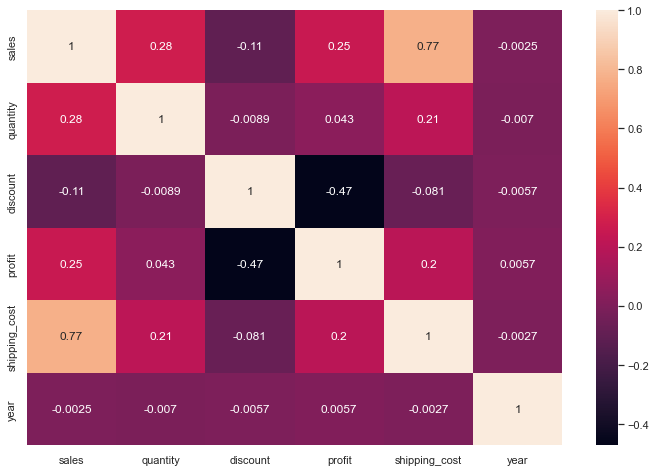

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot = True)
plt.show()

# EDA

# Q1: Which segment is the best seller?

In [21]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [22]:
df1["segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

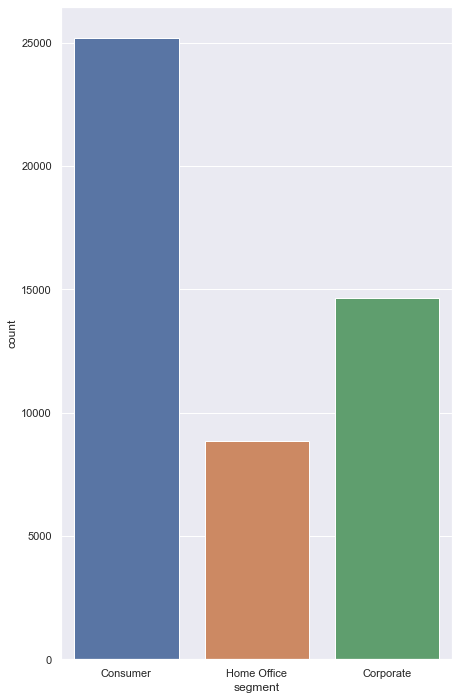

In [23]:
plt.figure(figsize=(7,12))
sns.countplot(df1["segment"])
plt.show()

# Q2: Which Region has the highest order count and In which Region do we need to grow our Business?¶


In [24]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [25]:
df1["region"].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'Caribbean', 'South', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

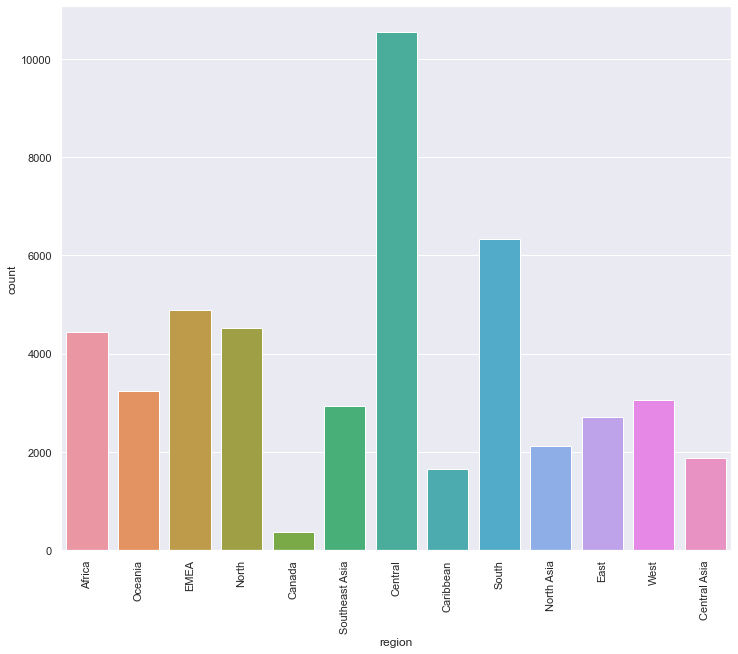

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(df1["region"])
plt.xticks(rotation=90)
plt.show()

# Q3: Who are the Top 10 Customers of the SuperStore and How much is their Repartition of the Profit?¶

In [27]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [28]:
df1["customer_name"].nunique()

795

In [29]:
df2 = df1.groupby("customer_name")["profit"].sum().reset_index()
df3 = df2.sort_values(by = "profit",ascending=False).head(10).round(0)
df3

,customer_name,profit
421,Katharine Harms,3400.0
502,Mathew Reese,3105.0
109,Brian Moss,3028.0
673,Sanjit Engle,3007.0
386,John Grady,2870.0
90,Bill Shonely,2840.0
450,Larry Tron,2805.0
374,Jim Karlsson,2791.0
565,Neil Knudson,2790.0
451,Laura Armstrong,2774.0


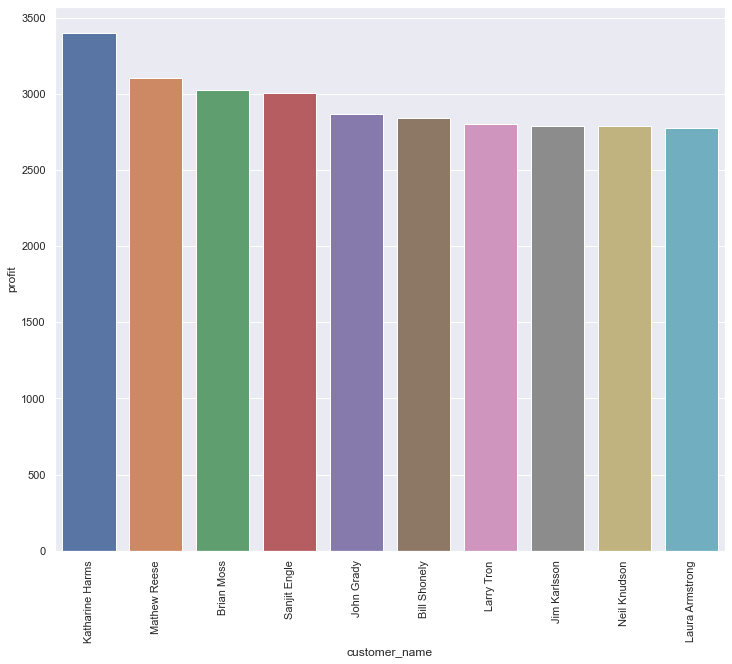

In [30]:
plt.figure(figsize=(12,10))
sns.barplot(x = "customer_name",y = "profit", data = df3)
plt.xticks(rotation = 90)
plt.show()

# How much each Sub-Category is contributing in Sales of SuperStore?


In [31]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [32]:
df1["sub_category"].unique()

array(['Storage', 'Supplies', 'Paper', 'Furnishings', 'Machines',
       'Appliances', 'Copiers', 'Chairs', 'Tables', 'Bookcases', 'Phones',
       'Accessories', 'Labels', 'Art', 'Envelopes', 'Fasteners',
       'Binders'], dtype=object)

In [33]:
df4 = df1.groupby("sub_category")["sales"].count().reset_index()
df4

,sub_category,sales
0,Accessories,2956
1,Appliances,1427
2,Art,4882
3,Binders,6108
4,Bookcases,2031
5,Chairs,3105
6,Copiers,1810
7,Envelopes,2435
8,Fasteners,2420
9,Furnishings,3163


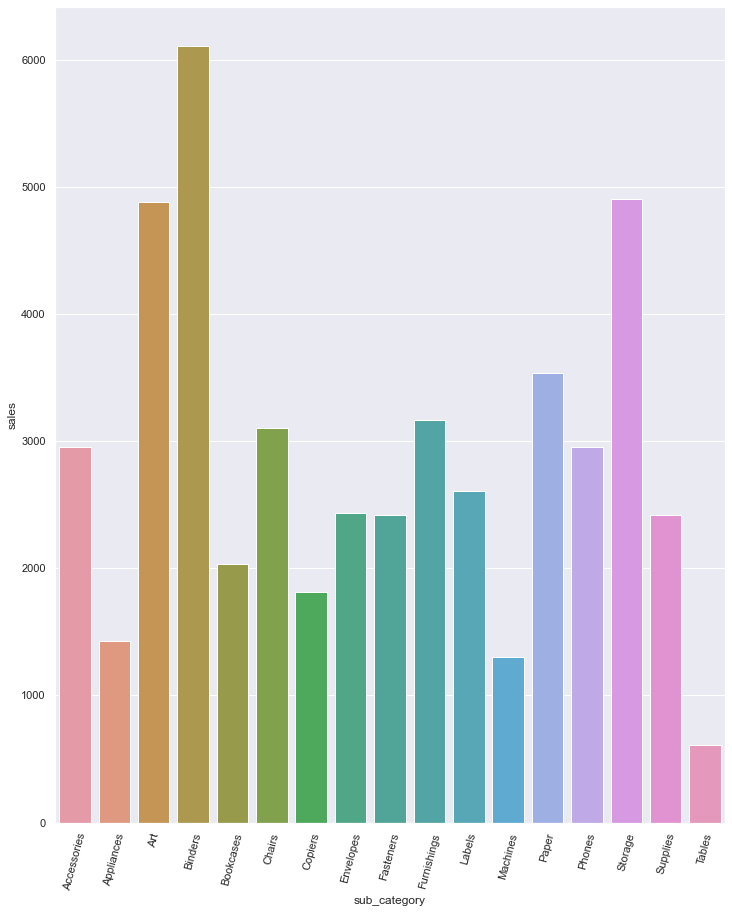

In [34]:
plt.figure(figsize=(12,15))
sns.barplot(x = "sub_category", y = "sales", data= df4,saturation=0.65)
plt.xticks(rotation = 75)
plt.show()

# What are the Top 10 States with highest Order Count?¶

In [35]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [36]:
df1["state"].nunique()

1088

In [37]:
df5 = df1.groupby("state")["sales"].count().sort_values(ascending=False).head(10).reset_index()
df5

,state,sales
0,California,1901
1,England,1388
2,New York,1060
3,Texas,959
4,Ile-de-France,900
5,New South Wales,715
6,North Rhine-Westphalia,670
7,Queensland,659
8,San Salvador,586
9,Pennsylvania,565


#    # Look for Top 10 Consumer Countries is contributing in sales of supermarket 

In [38]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [39]:
df1["country"].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Mexico', 'Cuba',
       'France', 'Brazil', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia', 'Mongolia',
       'Belgium', 'Kenya', 'El Salvador', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [40]:
df7 = df1.groupby("country")["sales"].count().sort_values(ascending=False).head(10)
df8 = df7.reset_index()
df8

,country,sales
0,United States,9523
1,France,2626
2,Australia,2623
3,Mexico,2514
4,Germany,1928
5,China,1696
6,Brazil,1530
7,United Kingdom,1512
8,India,1411
9,Turkey,1367


# Look for Top 10 Consumer Countries is contributing in profit of supermarket 

In [41]:
df9 = df1.groupby("country")["profit"].sum().sort_values(ascending=False).head(10).reset_index()
df9

,country,profit
0,United States,138292.93160
1,China,85736.15100
2,France,71152.04250
3,Germany,67514.97150
4,India,67316.68500
5,Mexico,67190.97832
6,United Kingdom,56649.52500
7,Australia,51011.63100
8,Spain,30682.19700
9,El Salvador,30367.47532


# What are the Top 3 Consumer Countries orders as per Segment & Category?

In [42]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [43]:
df1["segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [44]:
df1["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [45]:
df9 = df1["country"].value_counts().head(3).reset_index().rename(columns = {"index":"country",
                                                                           "country":"count_sales"})
df9

,country,count_sales
0,United States,9523
1,France,2626
2,Australia,2623


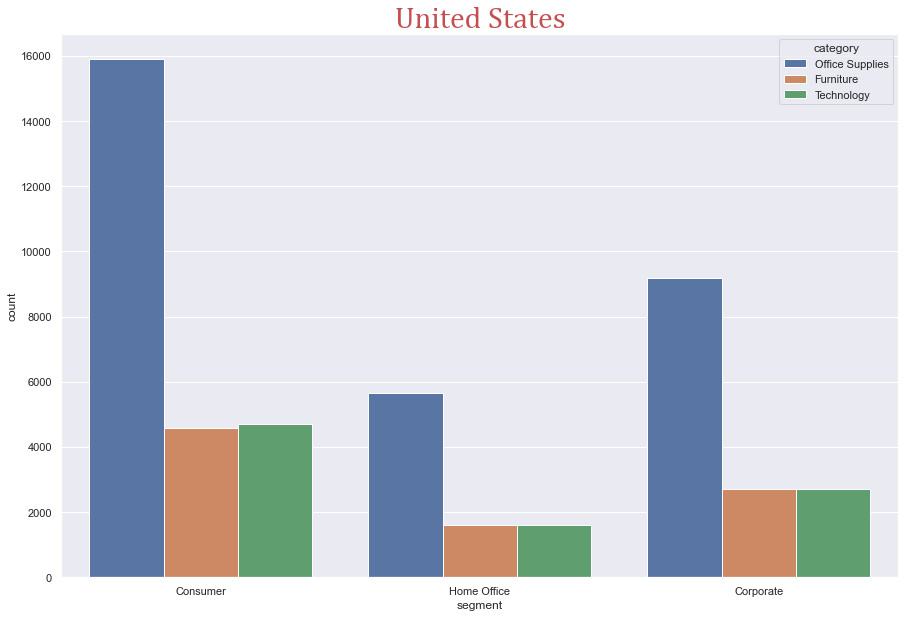

In [46]:
plt.figure(figsize=(15,10))
plt.title("United States",fontdict=f1)
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()

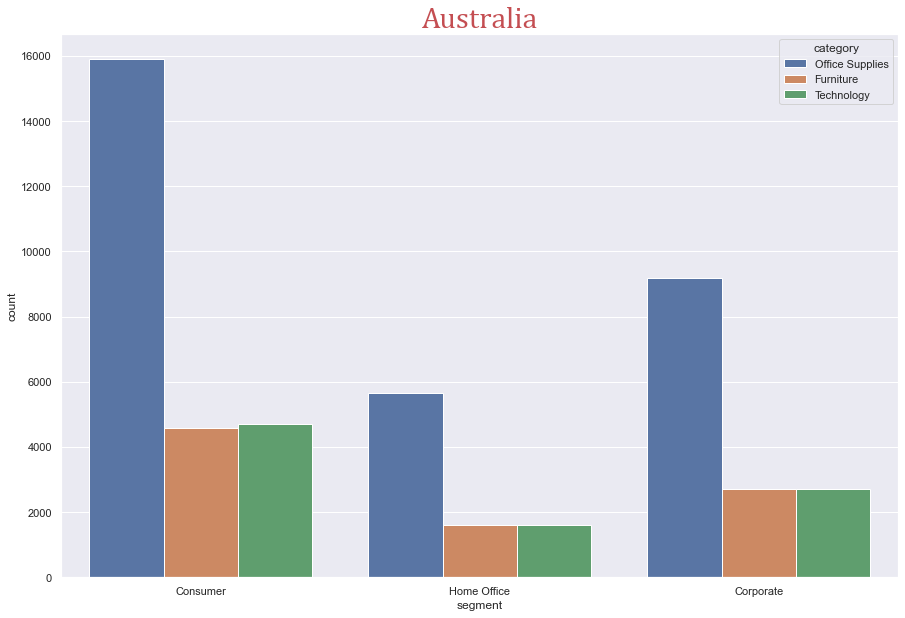

In [47]:
plt.figure(figsize=(15,10))
plt.title("Australia",fontdict=f1)
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()

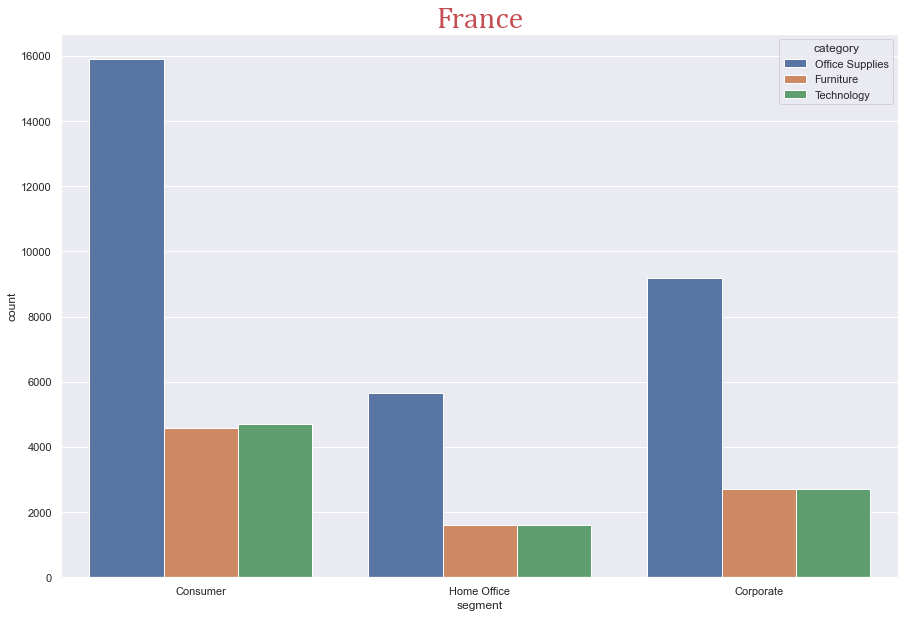

In [48]:
plt.figure(figsize=(15,10))
plt.title("France",fontdict=f1)
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()

# Growth of Superstore Sales over the year 2011-2014?¶


In [49]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [50]:
df1["year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [51]:
df11 = df1.groupby("year")["sales"].sum().reset_index()
df11

,year,sales
0,2011,1378151.0
1,2012,1681499.0
2,2013,2107021.0
3,2014,2668457.0


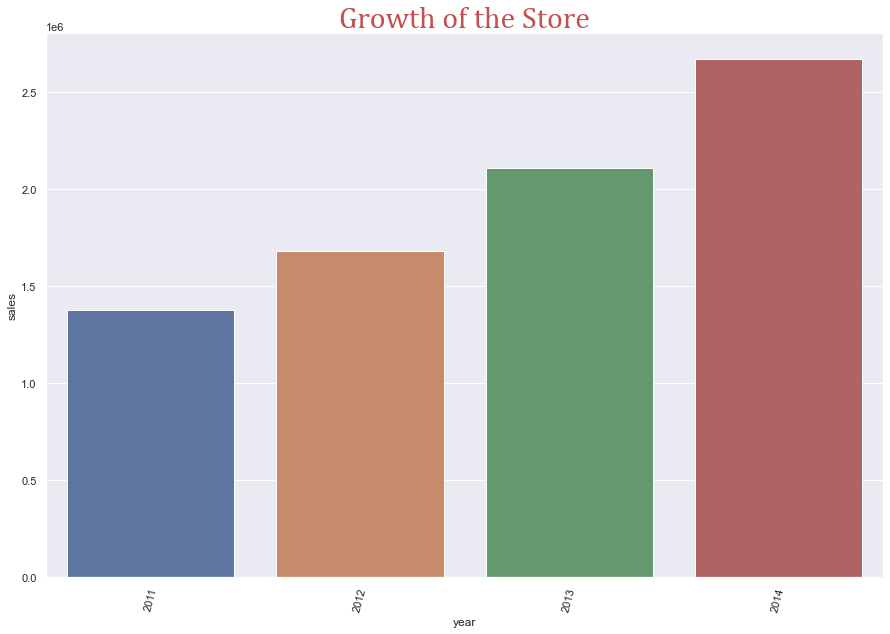

In [52]:
plt.figure(figsize=(15,10))
sns.barplot(x = "year", y = "sales", data= df11,saturation=0.65)
plt.xticks(rotation = 75)
plt.title("Growth of the Store",fontdict=f1)
plt.show()

# Growth of Superstore quantity over the year 2011-2014?¶


In [53]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [54]:
df1["year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [55]:
df12 = df1.groupby("year")["quantity"].sum().reset_index()
df12

,year,quantity
0,2011,28763
1,2012,34899
2,2013,44041
3,2014,55340


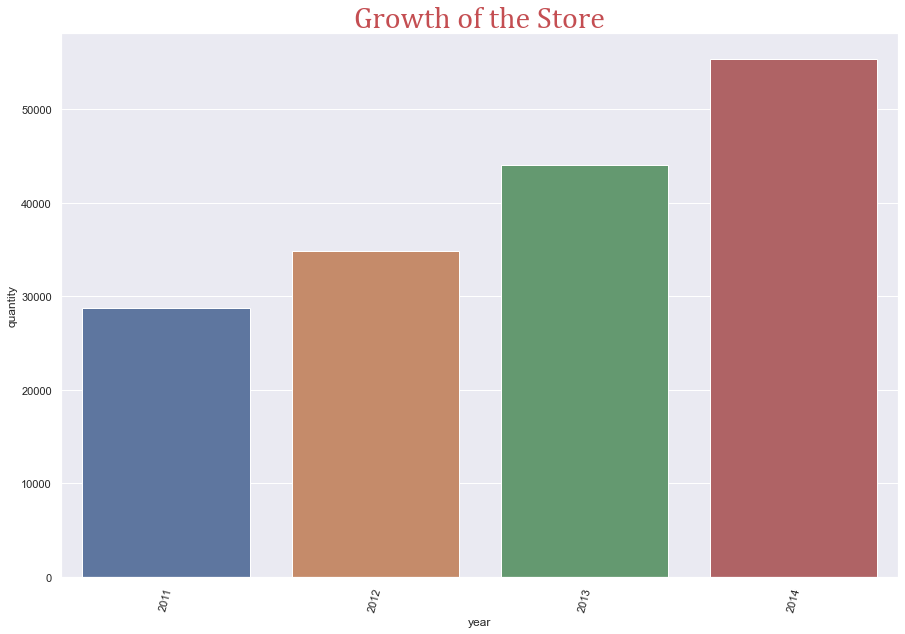

In [56]:
plt.figure(figsize=(15,10))
sns.barplot(x = "year", y = "quantity", data= df12,saturation=0.65)
plt.xticks(rotation = 75)
plt.title("Growth of the Store",fontdict=f1)
plt.show()

# Analyzing Profit category and sub_category wise 

In [57]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [58]:
df13 = df1.groupby(["category","sub_category"])["profit"].sum().reset_index()
df13

,category,sub_category,profit
0,Furniture,Bookcases,53580.68990
1,Furniture,Chairs,68377.74450
2,Furniture,Furnishings,45012.21550
3,Furniture,Tables,-69921.27200
4,Office Supplies,Appliances,29702.84570
5,Office Supplies,Art,57842.60850
6,Office Supplies,Binders,48538.11600
7,Office Supplies,Envelopes,29601.11630
8,Office Supplies,Fasteners,11525.42410
9,Office Supplies,Labels,15010.51200


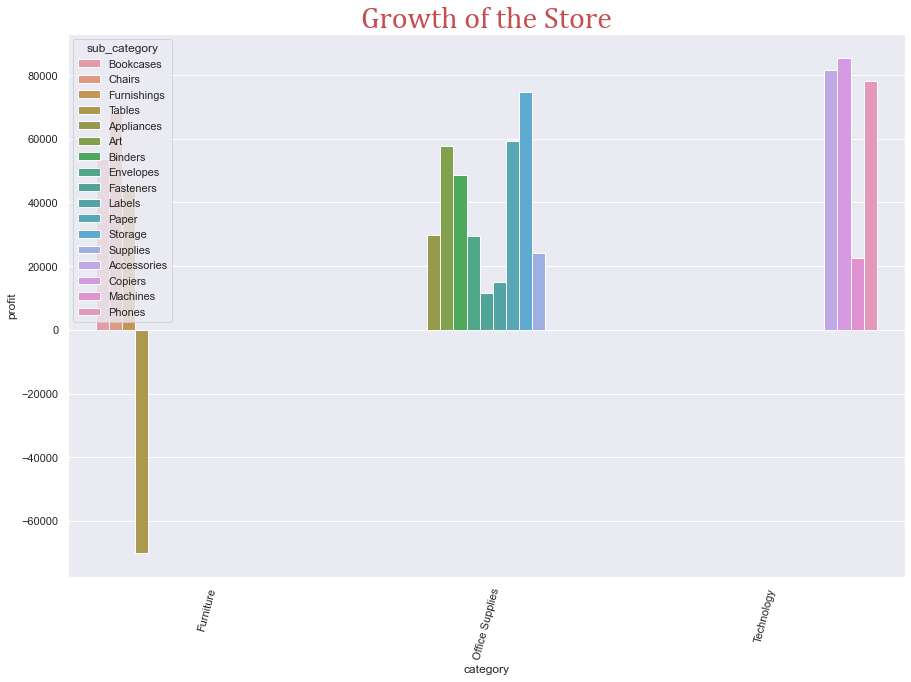

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(x = "category", y = "profit", data= df13,saturation=0.65, hue = "sub_category")
plt.xticks(rotation = 75)
plt.title("Growth of the Store",fontdict=f1)
plt.show()

# Analyzing Profit from each Market in the World

In [60]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [61]:
df1["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [62]:
df14 = df1.groupby(["segment","market"])["profit"].sum().reset_index()
df14

,segment,market,profit
0,Consumer,APAC,102256.62970
1,Consumer,Africa,17075.41500
2,Consumer,Canada,6865.14000
3,Consumer,EMEA,5981.83800
4,Consumer,EU,97761.50400
5,Consumer,LATAM,61972.67200
6,Consumer,US,68011.96000
7,Corporate,APAC,58161.73990
8,Corporate,Africa,4210.48500
9,Corporate,Canada,3476.58000


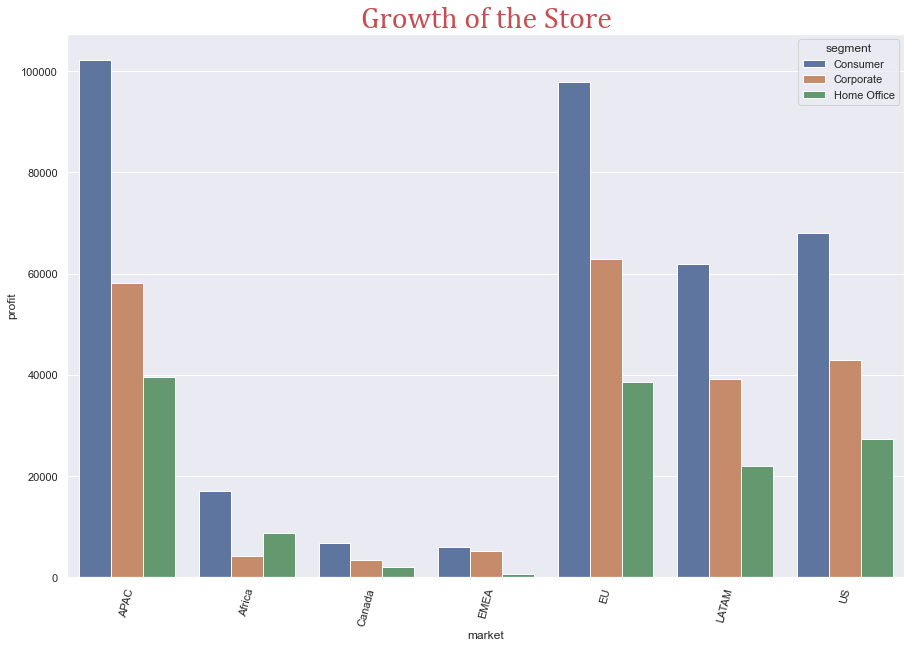

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market", y = "profit", data= df14,saturation=0.65, hue = "segment")
plt.xticks(rotation = 75)
plt.title("Growth of the Store",fontdict=f1)
plt.show()

# Analyzing sales from each Market in the World

In [64]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [65]:
df14 = df1.groupby("market")["sales"].sum().reset_index()
df14

,market,sales
0,APAC,2000746.0
1,Africa,538115.0
2,Canada,50314.0
3,EMEA,575562.0
4,EU,1803099.0
5,LATAM,1563126.0
6,US,1304166.0


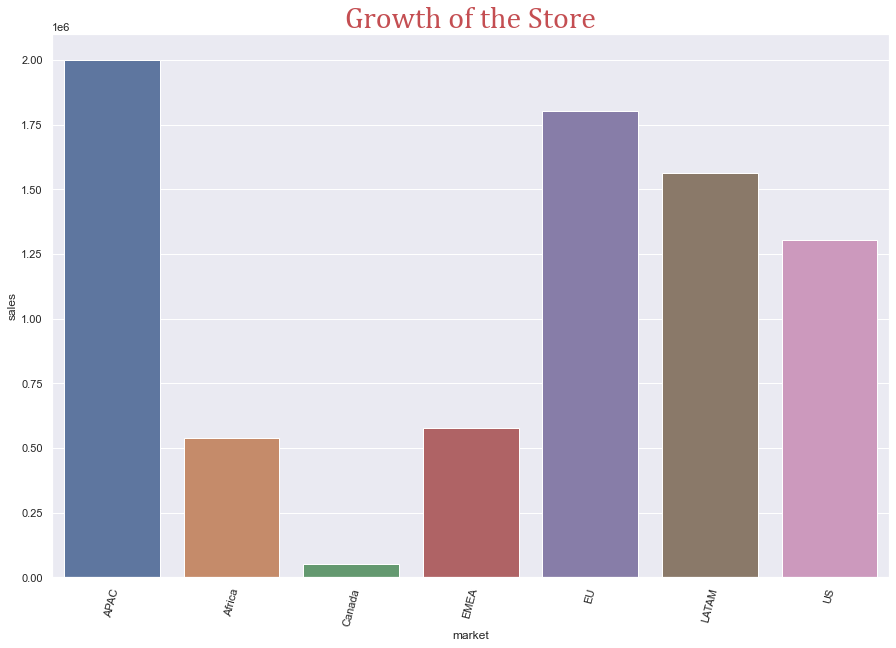

In [66]:
plt.figure(figsize=(15,10))
sns.barplot(x = "market", y = "sales", data= df14,saturation=0.65)
plt.xticks(rotation = 75)
plt.title("Growth of the Store",fontdict=f1)
plt.show()

# Top 5 Profitable Countries?

In [67]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [68]:
df1["country"].unique()

array(['Algeria', 'Australia', 'Hungary', 'Sweden', 'Canada',
       'New Zealand', 'Iraq', 'Philippines', 'United Kingdom', 'Malaysia',
       'Guatemala', 'Iran', 'Thailand', 'Tanzania', 'Mexico', 'Cuba',
       'France', 'Brazil', 'United States', 'Japan', 'Sudan', 'Taiwan',
       'Indonesia', 'Vietnam', 'Angola', 'China', 'Mozambique', 'Lebanon',
       'Singapore', 'Netherlands', 'Nigeria', 'Egypt', 'Venezuela',
       'South Africa', 'Spain', 'India', 'Turkey', 'Austria', 'Italy',
       'Germany', 'Nicaragua', 'Dominican Republic', 'Denmark',
       'Saudi Arabia', 'Zambia', 'Myanmar (Burma)', 'Russia', 'Mongolia',
       'Belgium', 'Kenya', 'El Salvador', 'Colombia', 'Estonia',
       'Madagascar', 'Portugal', 'Morocco', 'Sierra Leone', 'Norway',
       'Central African Republic', 'Czech Republic', 'Benin',
       'Bangladesh', 'Panama', 'Chile', 'South Korea', 'Switzerland',
       'Moldova', 'Uganda', 'Zimbabwe', 'Niger', 'Senegal', 'Hong Kong',
       'Democratic Republic o

In [69]:
df16 = df1.groupby("country")["profit"].sum().sort_values(ascending = False).reset_index().head(5)
df16

,country,profit
0,United States,138292.9316
1,China,85736.1510
2,France,71152.0425
3,Germany,67514.9715
4,India,67316.6850


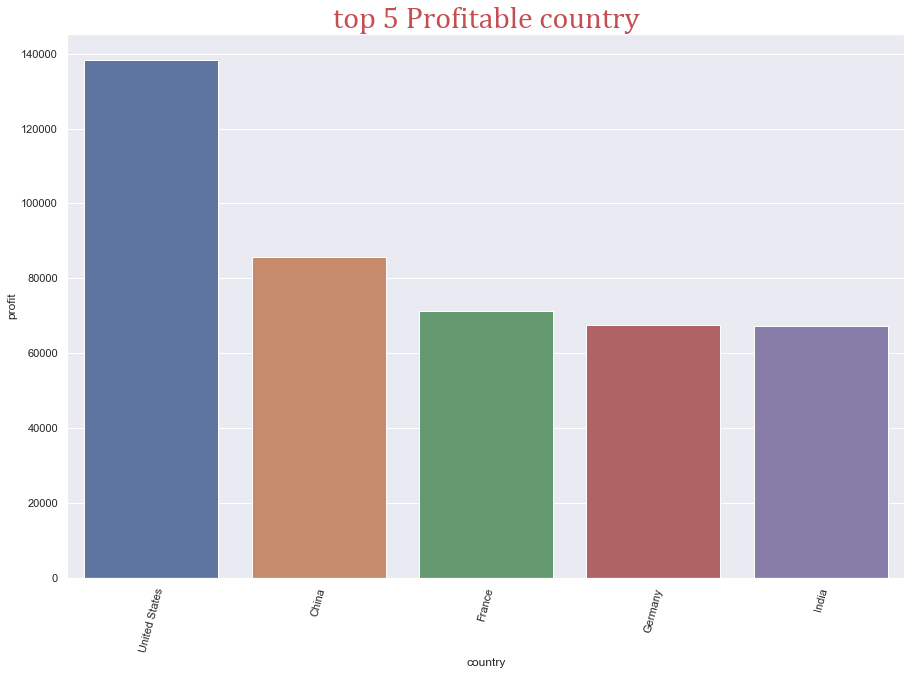

In [70]:
plt.figure(figsize=(15,10))
sns.barplot(x = "country", y = "profit", data= df16,saturation=0.65)
plt.xticks(rotation = 75)
plt.title("top 5 Profitable country",fontdict=f1)
plt.show()

# What are the top 10 most selling Products?¶

In [71]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [72]:
df1["product_name"].nunique()

3742

In [73]:
df17 = df1.groupby("product_name")["sales"].sum().sort_values(ascending = False).head(10).reset_index()
df17

,product_name,sales
0,"Eldon File Cart, Single Width",31319.0
1,"Rogers File Cart, Single Width",22645.0
2,"Tenex File Cart, Single Width",20778.0
3,"Smead File Cart, Single Width",20775.0
4,"Office Star Executive Leather Armchair, Adjust...",19355.0
5,"Fellowes Lockers, Industrial",19172.0
6,"Smead Lockers, Industrial",18648.0
7,"Hewlett Copy Machine, Color",16849.0
8,"Rogers Lockers, Blue",16494.0
9,"Fellowes Lockers, Wire Frame",16470.0


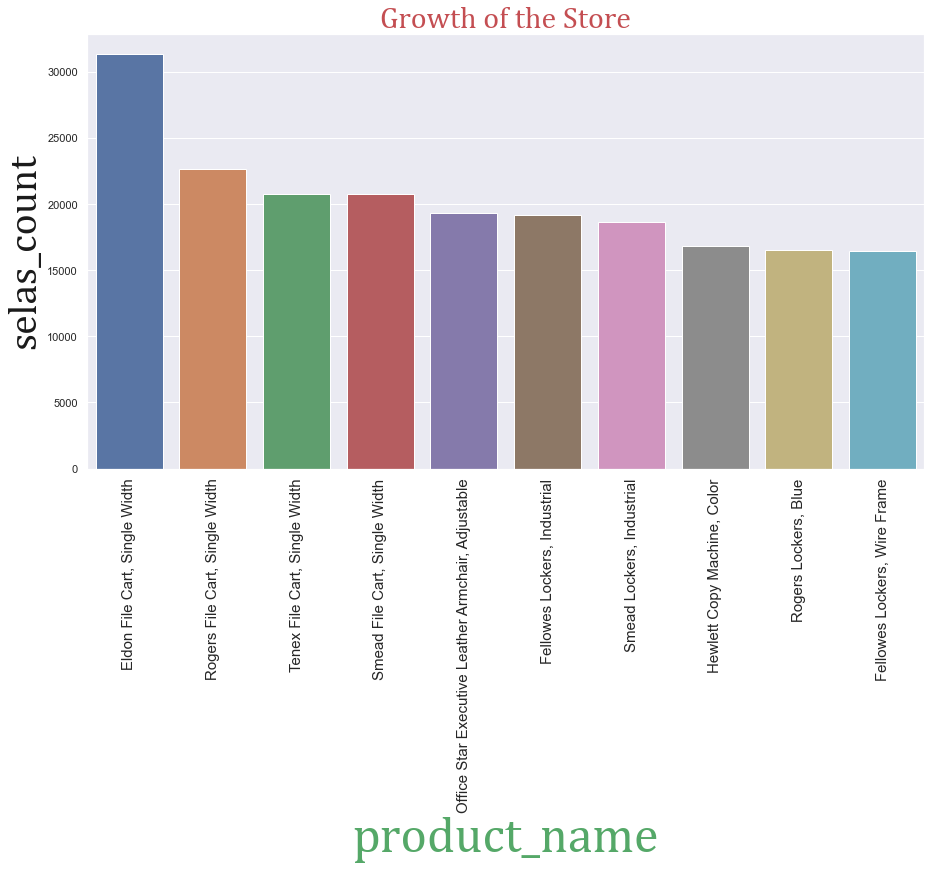

In [74]:
plt.figure(figsize=(15,8))
f2 = {"family":"cambria","color":"g","size":50}
f3  = {"family":"cambria","color":"k","size":40}
sns.barplot(x="product_name",y="sales",data = df17)
plt.xlabel("product_name", fontdict=f2)
plt.ylabel("selas_count",fontdict=f3)
plt.title("Growth of the Store",fontdict=f1)
plt.xticks(rotation=90,fontsize = 15)
plt.show()

# What is the most preferred Shipment Mode?¶

In [75]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [76]:
df1["ship_mode"].unique()

array(['Standard Class', 'Second Class', 'Same Day', 'First Class'],
      dtype=object)

In [77]:
df1["ship_mode"].value_counts()

Standard Class    29202
Second Class       9789
First Class        7121
Same Day           2548
Name: ship_mode, dtype: int64

In [78]:
df1["ship_mode"].value_counts().keys()

Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object')

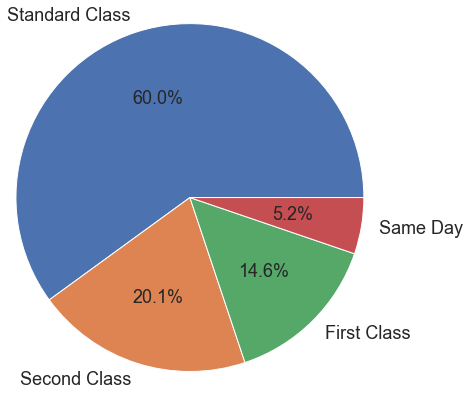

In [79]:
plt.pie(df1["ship_mode"].value_counts(),labels=df1["ship_mode"].value_counts().keys(),autopct="%0.1f%%",radius= 2,  textprops = {"fontsize" : 18})
plt.show()

# In which Region the store is giving more discount and what is the most profitable region?¶

In [80]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [81]:
df1["region"].unique()

array(['Africa', 'Oceania', 'EMEA', 'North', 'Canada', 'Southeast Asia',
       'Central', 'Caribbean', 'South', 'North Asia', 'East', 'West',
       'Central Asia'], dtype=object)

In [82]:
df19 = df1.groupby("region")["discount","profit"].sum()
df19

,discount,profit
region,,
Africa,717.100,30140.61900
Canada,0.000,12332.55000
Caribbean,226.606,21379.30896
Central,1479.998,168764.86940
Central Asia,133.500,66450.97000
EMEA,977.700,11810.25900
East,393.300,42644.30580
North,444.272,106622.10832
North Asia,105.400,86676.69300


Text(0, 0.5, 'In Lakhs')

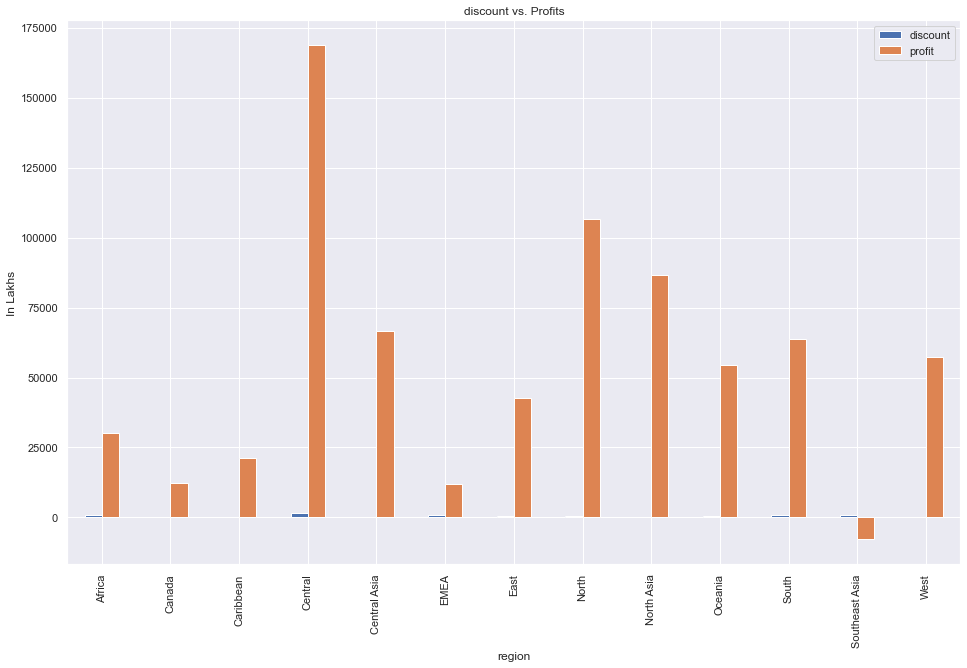

In [83]:
df19.plot(kind='bar',figsize=(16,10))
plt.title("discount vs. Profits")
plt.ylabel("In Lakhs")

# Creating only Profit/Loss Dataframe to calculate Total Profit & Loss of the superstore from 2011-2014 and the Net Profit¶


In [84]:
df_profit = df1[df1["profit"]>0]
df_profit.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011
5,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.0,2,0.1,15.342,1.80,Medium,2011


In [85]:
df_loss = df1[df1["profit"]<0]
df_loss.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.50,-26.0550,4.82,High,2011
8,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Technology,Copiers,"Hewlett Wireless Fax, Laser",912.0,4,0.40,-319.4640,107.10,Low,2011
10,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Office Supplies,Storage,"Tenex Lockers, Industrial",338.0,3,0.45,-122.8005,33.75,High,2011
11,IN-2011-65159,2011-03-01,2011-07-01,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Furniture,Tables,"Chromcraft Round Table, Adjustable Height",211.0,1,0.55,-70.3995,21.32,High,2011
14,ID-2011-80230,2011-03-01,2011-09-01,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Furniture,Chairs,"Hon Rocking Chair, Set of Two",159.0,2,0.40,-95.6760,10.07,Low,2011


In [86]:
total_profit = df_profit["profit"].sum().round(2)
total_profit

1425420.41

In [87]:
total_loss = df_loss["profit"].sum().round(2)
total_loss

-710690.23

In [88]:
net_worth =total_profit - total_loss
net_worth.round(2)

2136110.64

In [89]:
df_net_profit = pd.DataFrame({"total_profit" : {0:1425420.41},
                            "total_loss" : {0:710690.23},
                            "net_worth":{0:714730.18}})

In [90]:
df_net_profit

,total_profit,total_loss,net_worth
0,1425420.41,710690.23,714730.18


# Find weighted avarage sales by region

In [91]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [92]:
df_sales = df1.groupby("region")["sales"].sum().reset_index()
df_sales

,region,sales
0,Africa,538115.0
1,Canada,50314.0
2,Caribbean,251441.0
3,Central,1806638.0
4,Central Asia,389506.0
5,EMEA,575562.0
6,East,366492.0
7,North,790546.0
8,North Asia,453686.0
9,Oceania,625382.0


In [93]:
df_count = df1.groupby("region")["sales"].count().reset_index().rename(columns = {"sales":"freq"})
df_count

,region,freq
0,Africa,4448
1,Canada,375
2,Caribbean,1643
3,Central,10543
4,Central Asia,1867
5,EMEA,4891
6,East,2705
7,North,4520
8,North Asia,2121
9,Oceania,3238


In [94]:
df_wt = df_sales.merge(df_count,on = "region")
df_wt

,region,sales,freq
0,Africa,538115.0,4448
1,Canada,50314.0,375
2,Caribbean,251441.0,1643
3,Central,1806638.0,10543
4,Central Asia,389506.0,1867
5,EMEA,575562.0,4891
6,East,366492.0,2705
7,North,790546.0,4520
8,North Asia,453686.0,2121
9,Oceania,625382.0,3238


In [95]:
df_wt["fre_SUM"] = df_wt.sales * df_wt.freq

In [96]:
df_wt

,region,sales,freq,fre_SUM
0,Africa,538115.0,4448,2.393536e+09
1,Canada,50314.0,375,1.886775e+07
2,Caribbean,251441.0,1643,4.131176e+08
3,Central,1806638.0,10543,1.904738e+10
4,Central Asia,389506.0,1867,7.272077e+08
5,EMEA,575562.0,4891,2.815074e+09
6,East,366492.0,2705,9.913609e+08
7,North,790546.0,4520,3.573268e+09
8,North Asia,453686.0,2121,9.622680e+08
9,Oceania,625382.0,3238,2.024987e+09


In [97]:
weight_avg = df_wt.fre_SUM.sum() / df_wt.freq.sum()
weight_avg

870368.7723797781

# state wise profit of supermarket 

In [98]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [99]:
df1["state"].nunique()

1088

In [100]:
df21 = df1.groupby("state")[["profit","sales"]].sum()
df22 = df21.sort_values(by = "profit",ascending=False)
df22.head(10)

,profit,sales
state,,
England,49869.90600,273710.0
California,48342.49910,270615.0
New York,33118.39490,153366.0
Ile-de-France,29976.85800,188108.0
North Rhine-Westphalia,27066.12600,135097.0
San Salvador,25632.30912,105245.0
New South Wales,24131.54100,145380.0
Managua,14877.19724,59055.0
São Paulo,14736.37324,70388.0


# country wise profit of supermarket 

In [101]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [102]:
df1["country"].nunique()

147

In [103]:
df23 = df1.groupby("country")[["profit","sales"]].sum()
df24 = df23.sort_values(by = "profit",ascending=False)
df24.head(10)

,profit,sales
country,,
United States,138292.93160,1304166.0
China,85736.15100,368852.0
France,71152.04250,526745.0
Germany,67514.97150,389320.0
India,67316.68500,302511.0
Mexico,67190.97832,416083.0
United Kingdom,56649.52500,300040.0
Australia,51011.63100,516624.0
Spain,30682.19700,165619.0


# check state wise loss of supermarket 

In [104]:
df22.head()

,profit,sales
state,,
England,49869.9060,273710.0
California,48342.4991,270615.0
New York,33118.3949,153366.0
Ile-de-France,29976.8580,188108.0
North Rhine-Westphalia,27066.1260,135097.0


In [105]:
df25 = df22["profit"]<0

In [106]:
df25_loss = df22[df22["profit"]<0]
df25_loss.head(10)

,profit,sales
state,,
Táchira,-0.5400,33.0
Ayacucho,-1.3160,609.0
Cojedes,-3.3400,114.0
T?nh C?n Th?,-4.4103,1983.0
Matabeleland North,-5.3250,3.0
Kabarole,-5.4870,4.0
Lambayeque,-8.4240,32.0
Ardahan,-10.7760,36.0
Setúbal,-11.0250,182.0


# country wise loss of supermarket 

In [107]:
df24.head()

,profit,sales
country,,
United States,138292.9316,1304166.0
China,85736.1510,368852.0
France,71152.0425,526745.0
Germany,67514.9715,389320.0
India,67316.6850,302511.0


In [108]:
df26 = df24[df24["profit"]<0]
df26

,profit,sales
country,,
Tajikistan,-262.86600,242.0
Papua New Guinea,-475.62900,1786.0
United Arab Emirates,-1036.86000,742.0
Indonesia,-1336.08380,224180.0
Myanmar (Burma),-1864.07490,26341.0
Uganda,-2426.08500,1625.0
Vietnam,-3290.15730,47572.0
Turkmenistan,-3302.70900,2029.0
Haiti,-3659.76300,9945.0


In [109]:
df26.shape

(30, 2)

Text(0, 0.5, 'In Lakhs')

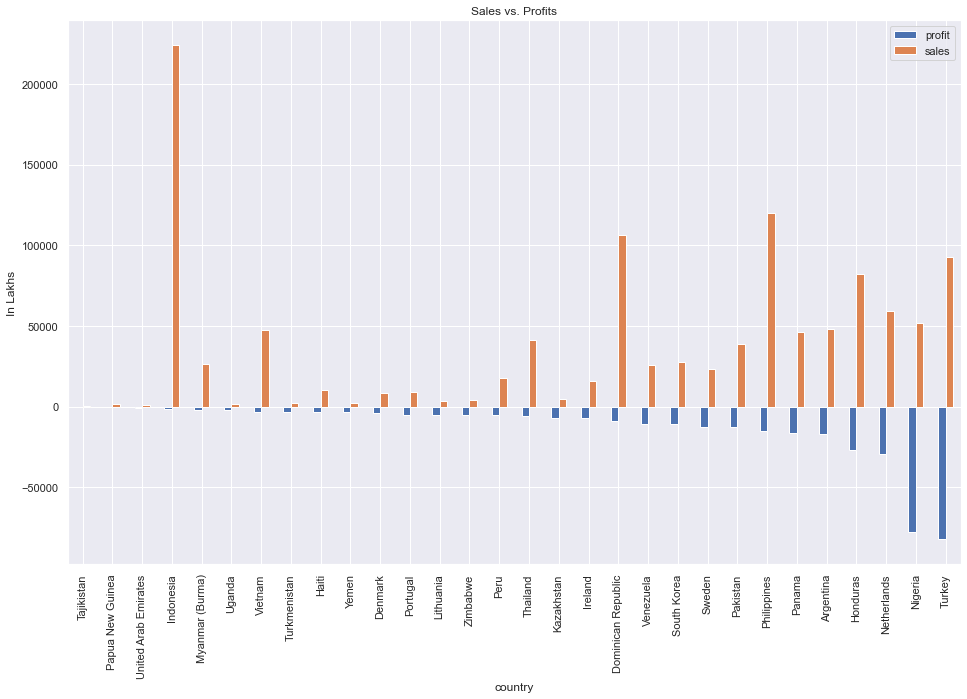

In [110]:
df26.plot(kind='bar',figsize=(16,10))
plt.title("Sales vs. Profits")
plt.ylabel("In Lakhs")

# What are the Highest selling and Lowest Selling Sub-Category?¶


In [111]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

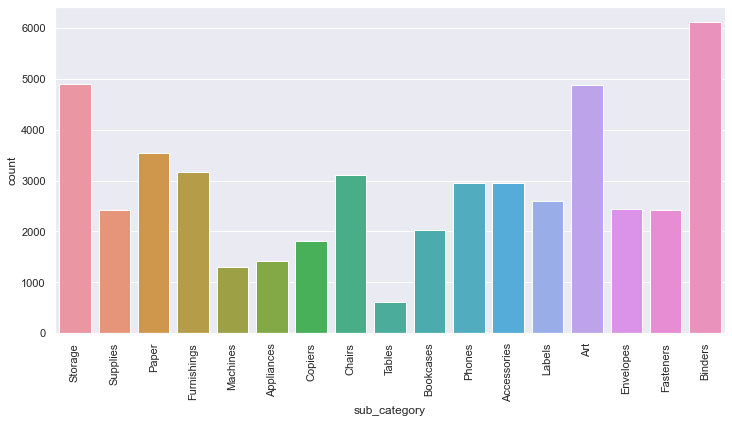

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x=df1['sub_category'])
plt.xticks(rotation=90)
plt.show()

# Analyzing the product needs of Top 10 countries as per Coustomer Segment¶


In [113]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [114]:
df1["segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [115]:
df27 = df1["country"].value_counts().head(10)
df27

United States     9523
France            2626
Australia         2623
Mexico            2514
Germany           1928
China             1696
Brazil            1530
United Kingdom    1512
India             1411
Turkey            1367
Name: country, dtype: int64

<AxesSubplot:title={'center':'Indonesia'}, xlabel='segment', ylabel='count'>

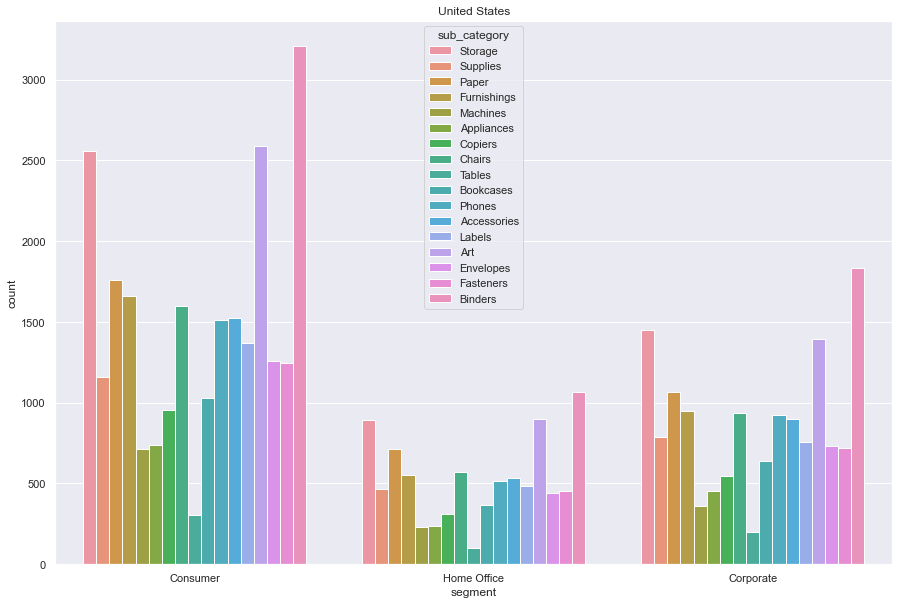

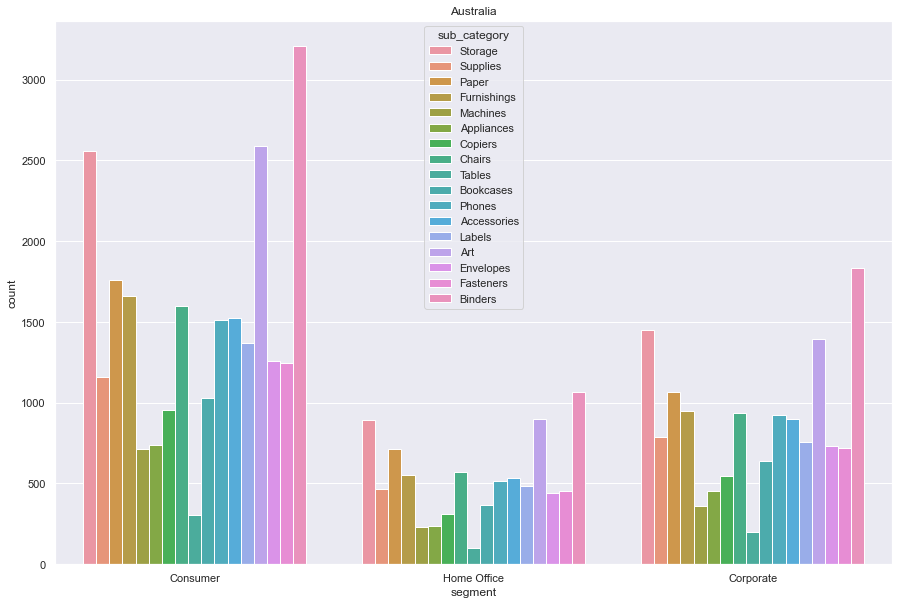

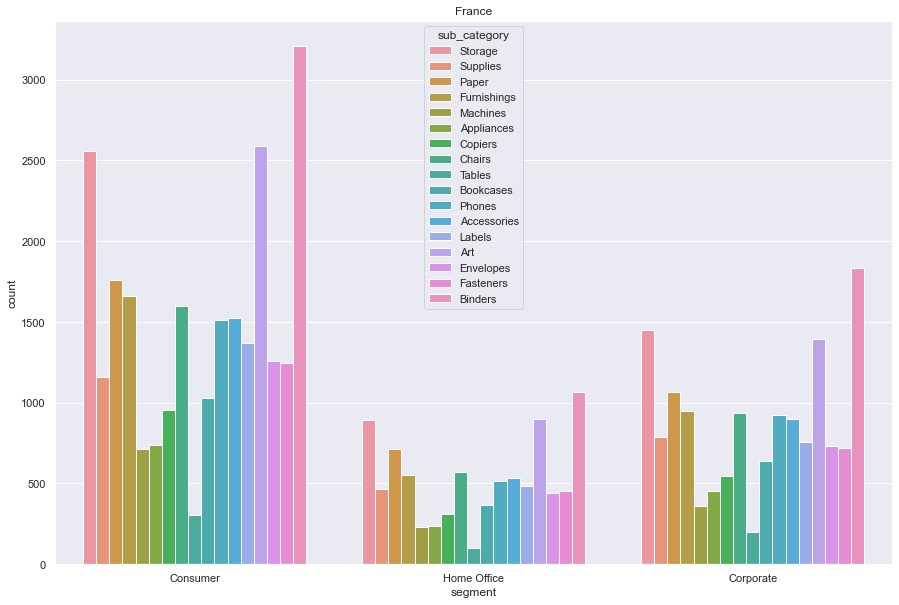

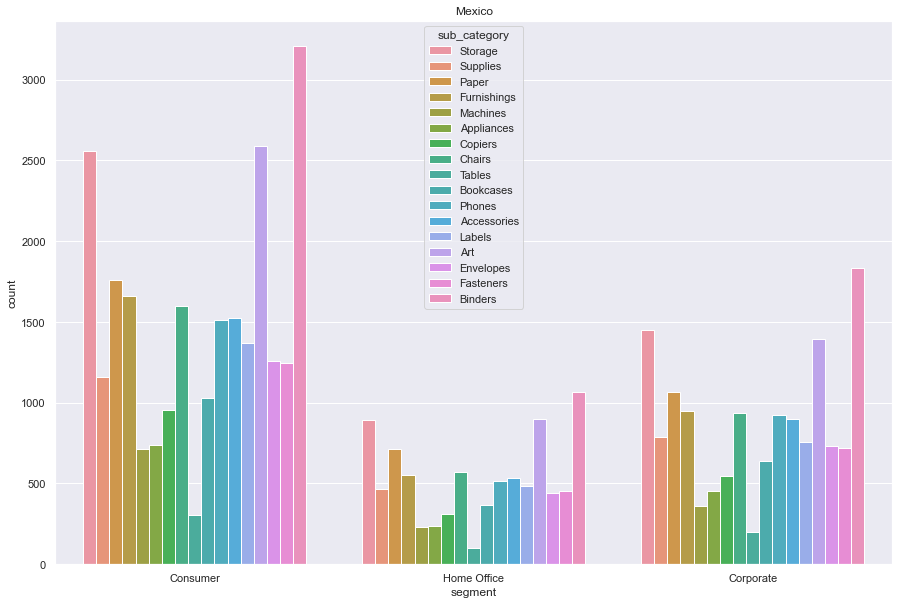

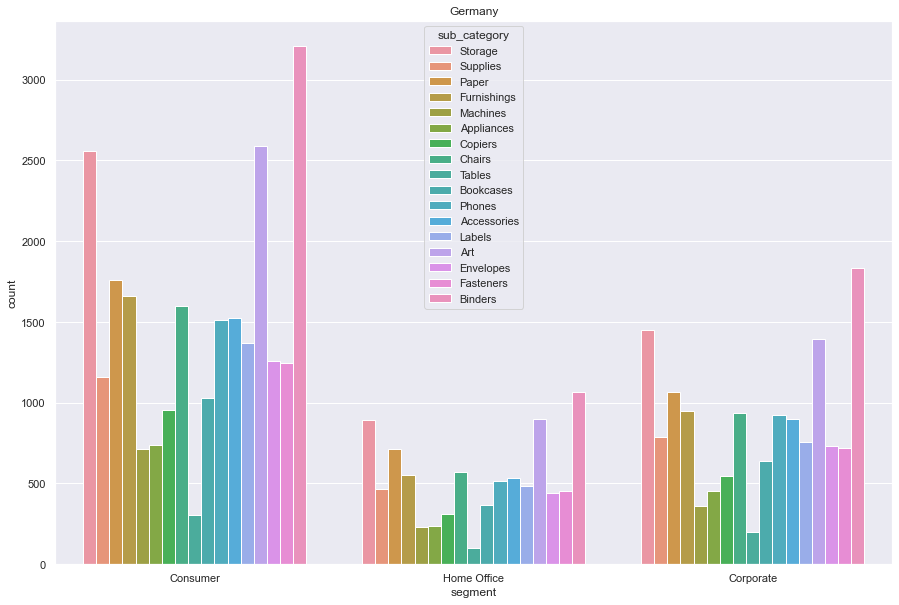

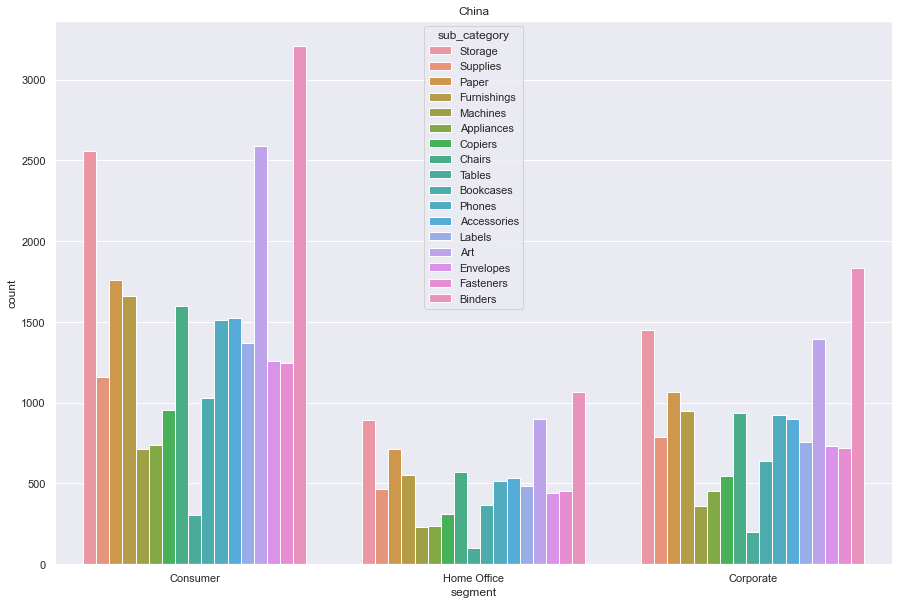

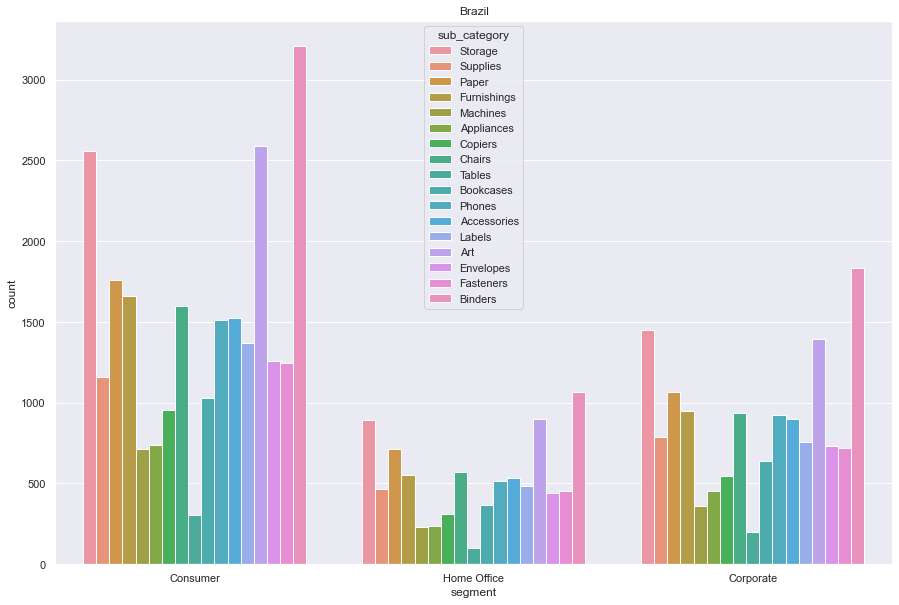

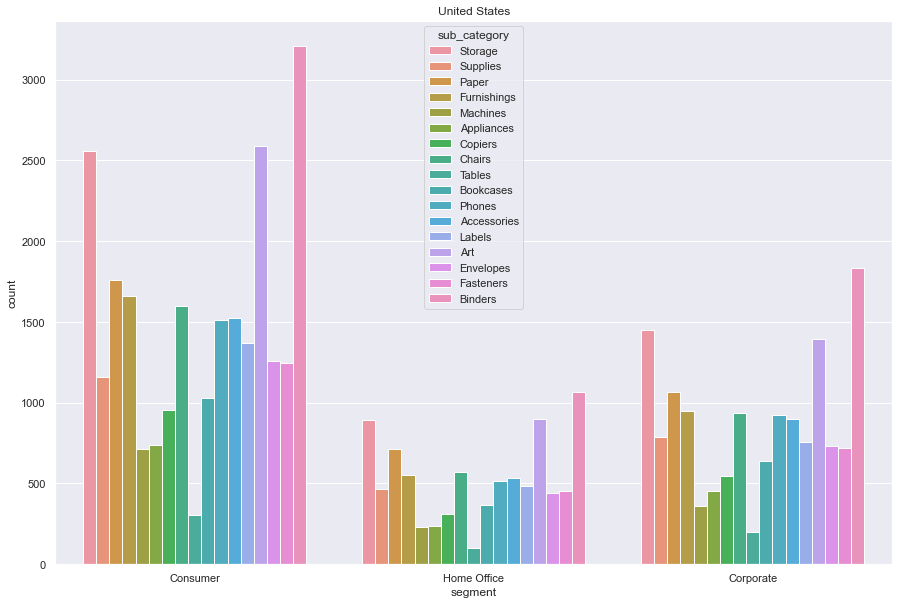

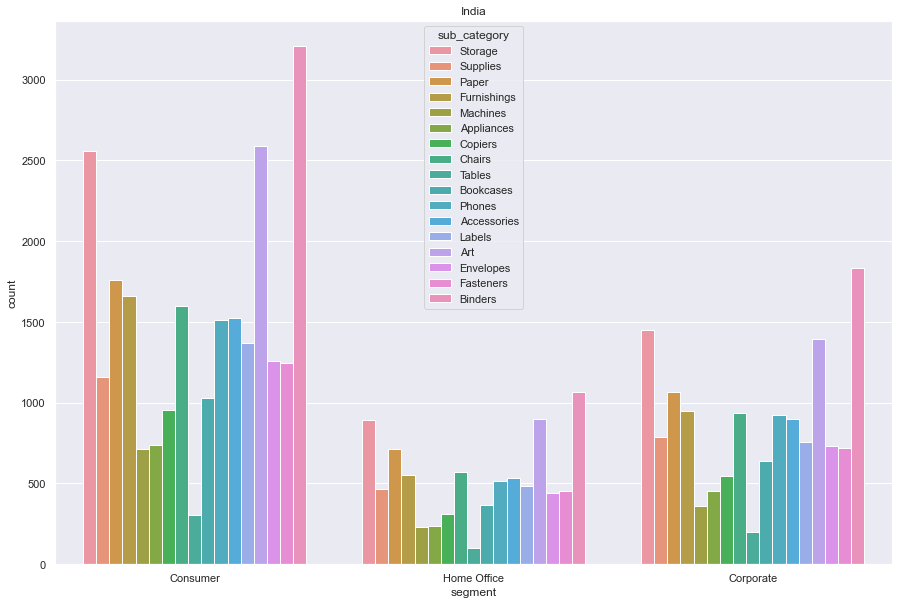

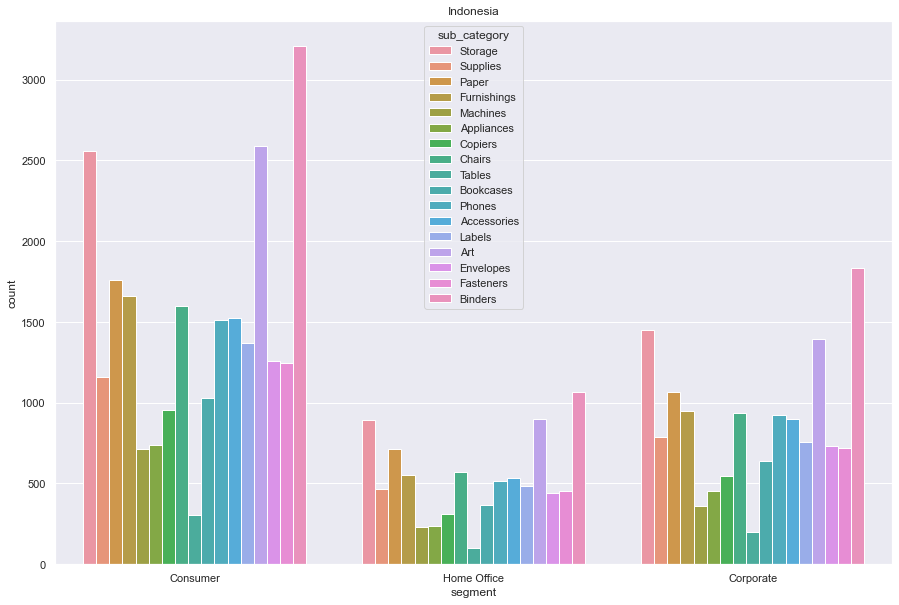

In [116]:
#Products by Categories consumed by Top 10 countries
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Australia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("France")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Mexico")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Germany")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("China")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Brazil")
sns.set_theme(style="darkgrid")
sns.countplot(x = df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("United States")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("India")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])
##################################
plt.figure(figsize=(15,10))
plt.title("Indonesia")
sns.set_theme(style="darkgrid")
sns.countplot(x=df1["segment"],hue=df1["sub_category"])

# year wise SALES vs. PROFITS¶

In [117]:
df1["year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [118]:
df28 = df1.groupby('year')[['sales','profit']].sum()
df28

,sales,profit
year,,
2011,1378151.0,112367.33366
2012,1681499.0,157966.74694
2013,2107021.0,194353.15878
2014,2668457.0,250042.93540


Text(0, 0.5, 'In Lakhs')

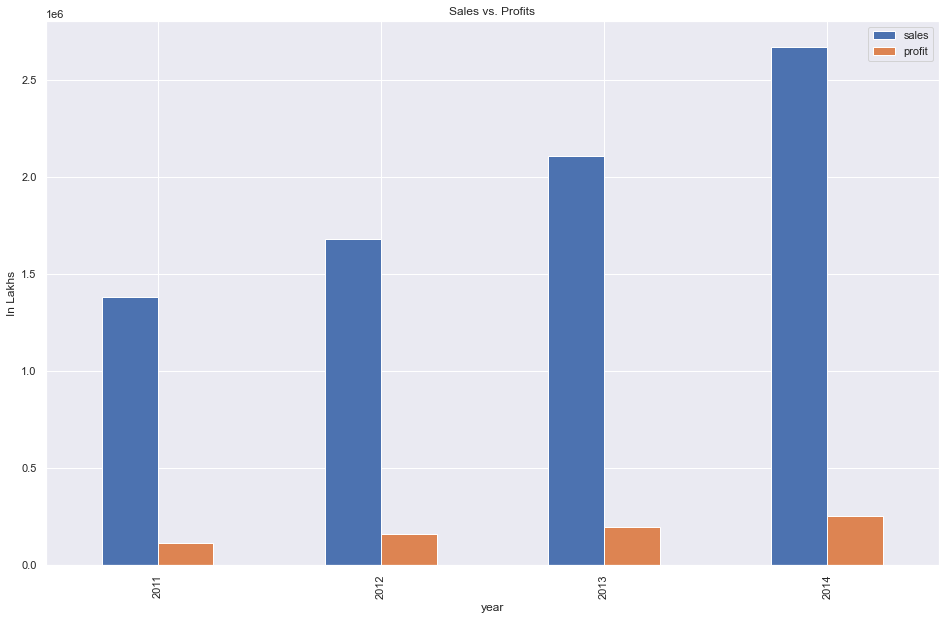

In [119]:
df28.plot(kind='bar',figsize=(16,10))
plt.title("Sales vs. Profits")
plt.ylabel("In Lakhs")

# Analyzing shiping mode for each category in Super-store¶


In [120]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

<AxesSubplot:xlabel='category', ylabel='count'>

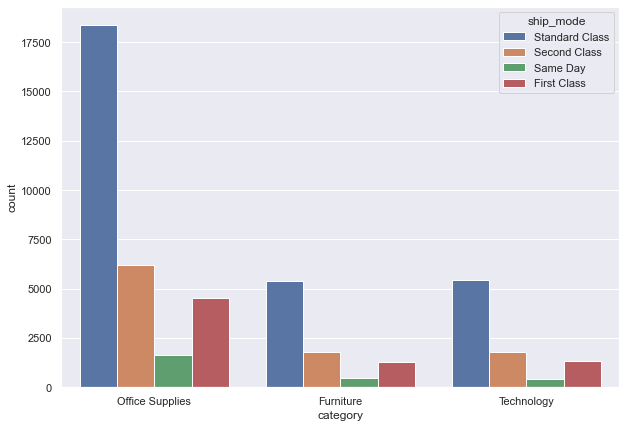

In [121]:
plt.figure(figsize=(10,7))
sns.countplot(x=df1["category"],hue=df1["ship_mode"])

# Checking the concentration of customer segment in each market¶


In [122]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [123]:
df1["market"].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

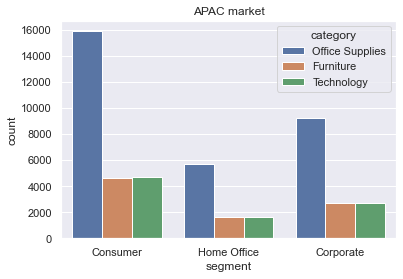

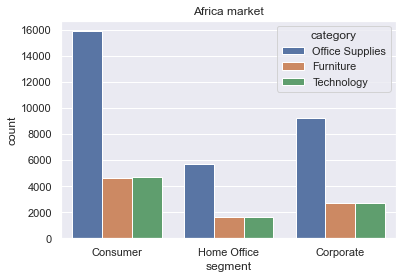

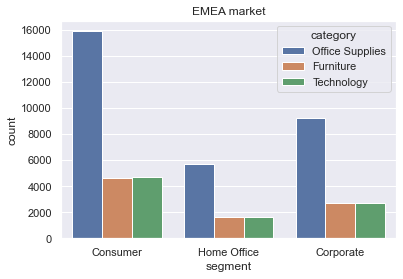

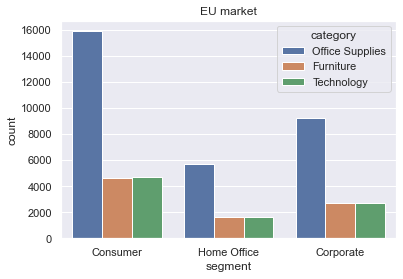

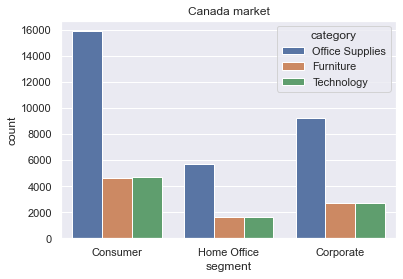

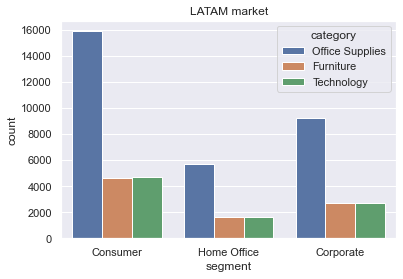

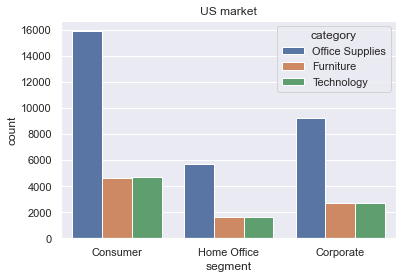

In [124]:
plt.title("APAC market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()

plt.title("Africa market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()


plt.title("EMEA market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()


plt.title("EU market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()


plt.title("Canada market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()


plt.title("LATAM market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()



plt.title("US market")
sns.countplot(x=df1["segment"],hue=df1["category"])
plt.show()

# Analyzing profits from each Category¶


In [125]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [126]:
df29 = df1.groupby("category")[["profit","sales"]].sum()
df29

,profit,sales
category,,
Furniture,97049.37790,2406605.0
Office Supplies,350107.32450,2790258.0
Technology,267573.47238,2638265.0


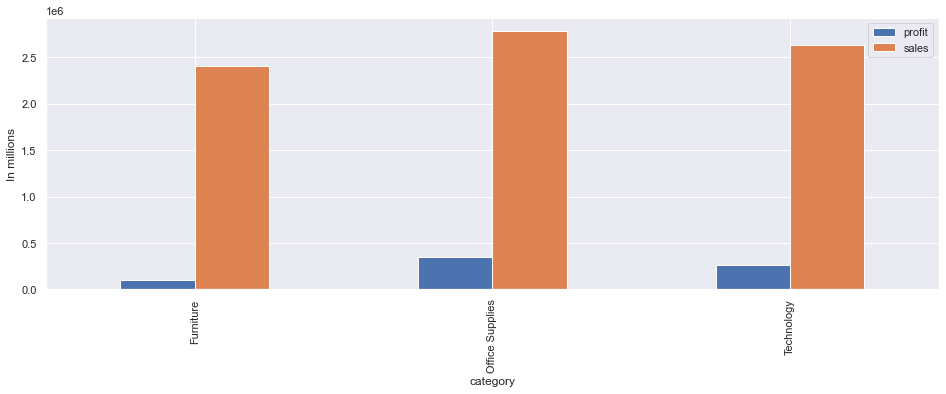

In [127]:
df29.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")
plt.show()

# Analyzing profits from each Market in world¶


In [128]:
df30 = df1.groupby('market')[['sales','profit']].sum()
df30

,sales,profit
market,,
APAC,2000746.0,199907.45090
Africa,538115.0,30140.61900
Canada,50314.0,12332.55000
EMEA,575562.0,11810.25900
EU,1803099.0,199171.49400
LATAM,1563126.0,123074.87028
US,1304166.0,138292.93160


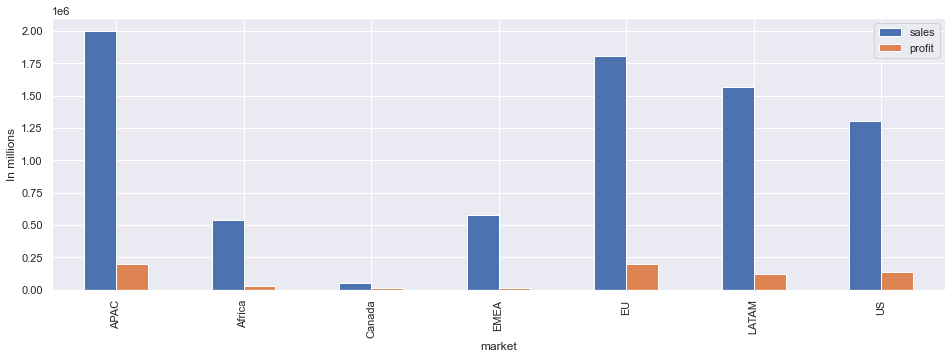

In [129]:
df30.plot(kind='bar',figsize=(16,5))
plt.ylabel("In millions")
plt.show()

# regional profits by segment

In [130]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [131]:
df31 = df1.groupby(["region","segment"])[["profit"]].sum()
df31

profit
region         segment                 
Africa         Consumer     17075.41500
               Corporate     4210.48500
               Home Office   8854.71900
Canada         Consumer      6865.14000
               Corporate     3476.58000
               Home Office   1990.83000
Caribbean      Consumer     11362.96628
               Corporate     7235.83972
               Home Office   2780.50296
Central        Consumer     78394.93122
               Corporate    55102.42690
               Home Office  35267.51128
Central Asia   Consumer     33354.81600
               Corporate    19736.76400
               Home Office  13359.39000
EMEA           Consumer      5981.83800
               Corporate     5179.33800
               Home Office    649.08300
East           Consumer     23088.58090
               Corporate    11056.67370
               Home Office   8499.05120
North          Consumer     51483.98052
               Corporate    36503.71956
               Home Office  18634.40824
North Asia     Consumer     42371.26200
               Corporate    27277.88100
               Home Office  17027.55000
Oceania        Consumer     28925.55600
               Corporate    16179.46200
               Home Office   9443.26800
South          Consumer     33151.31248
               Corporate    16640.50416
               Home Office  13963.03026
Southeast Asia Consumer     -2395.00430
               Corporate    -5032.36710
               Home Office   -341.12670
West           Consumer     30264.36460
               Corporate    18480.03600
               Home Office   8629.45590

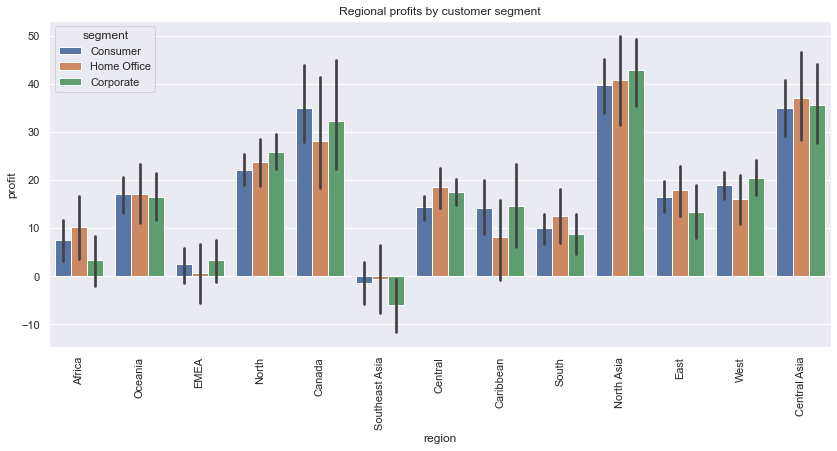

In [132]:
plt.figure(figsize=(14,6))
sns.barplot(data = df31, x = df1["region"], y = df1["profit"], hue = df1["segment"])
plt.xticks(rotation = 90)
plt.title("Regional profits by customer segment")
plt.show()

# regional sales by segment

In [133]:
df32 = df1.groupby(["region","segment"])[["sales"]].sum()
df32

sales
region         segment              
Africa         Consumer     288829.0
               Corporate    148790.0
               Home Office  100496.0
Canada         Consumer      26317.0
               Corporate     14371.0
               Home Office    9626.0
Caribbean      Consumer     121909.0
               Corporate     84377.0
               Home Office   45155.0
Central        Consumer     951781.0
               Corporate    523414.0
               Home Office  331443.0
Central Asia   Consumer     195862.0
               Corporate    116873.0
               Home Office   76771.0
EMEA           Consumer     290891.0
               Corporate    180550.0
               Home Office  104121.0
East           Consumer     185562.0
               Corporate    119370.0
               Home Office   61560.0
North          Consumer     393840.0
               Corporate    261153.0
               Home Office  135553.0
North Asia     Consumer     216330.0
               Corporate    139918.0
               Home Office   97438.0
Oceania        Consumer     323314.0
               Corporate    190974.0
               Home Office  111094.0
South          Consumer     551020.0
               Corporate    305163.0
               Home Office  174918.0
Southeast Asia Consumer     289642.0
               Corporate    150063.0
               Home Office   92467.0
West           Consumer     222821.0
               Corporate    134245.0
               Home Office   67107.0

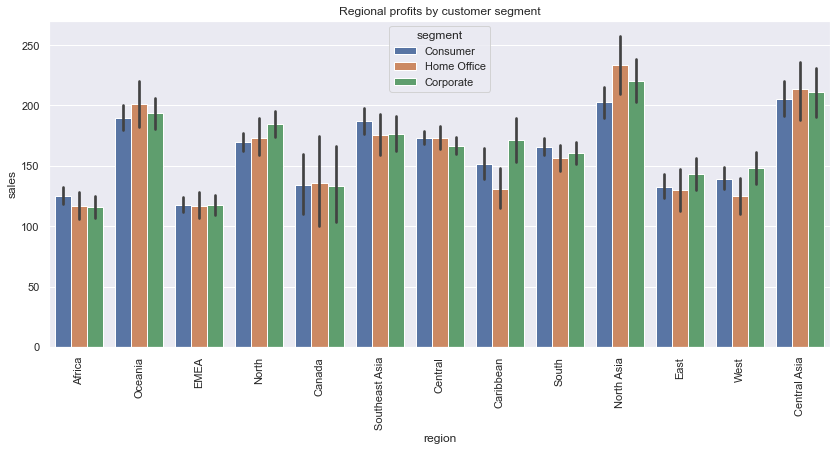

In [134]:
plt.figure(figsize=(14,6))
sns.barplot(data = df31, x = df1["region"], y = df1["sales"], hue = df1["segment"])
plt.xticks(rotation = 90)
plt.title("Regional profits by customer segment")
plt.show()

# profits and sales by sub-category of goods in 2014

In [135]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [136]:
df33 = df1.groupby(["year","sub_category"])["profit"].sum().reset_index()
df33

,year,sub_category,profit
0,2011,Accessories,10467.3298
1,2011,Appliances,5756.1202
2,2011,Art,10287.7209
3,2011,Binders,4707.4678
4,2011,Bookcases,9853.8312
...,...,...,...
63,2014,Paper,20975.8306
64,2014,Phones,26981.2150
65,2014,Storage,25919.8409
66,2014,Supplies,8597.9678


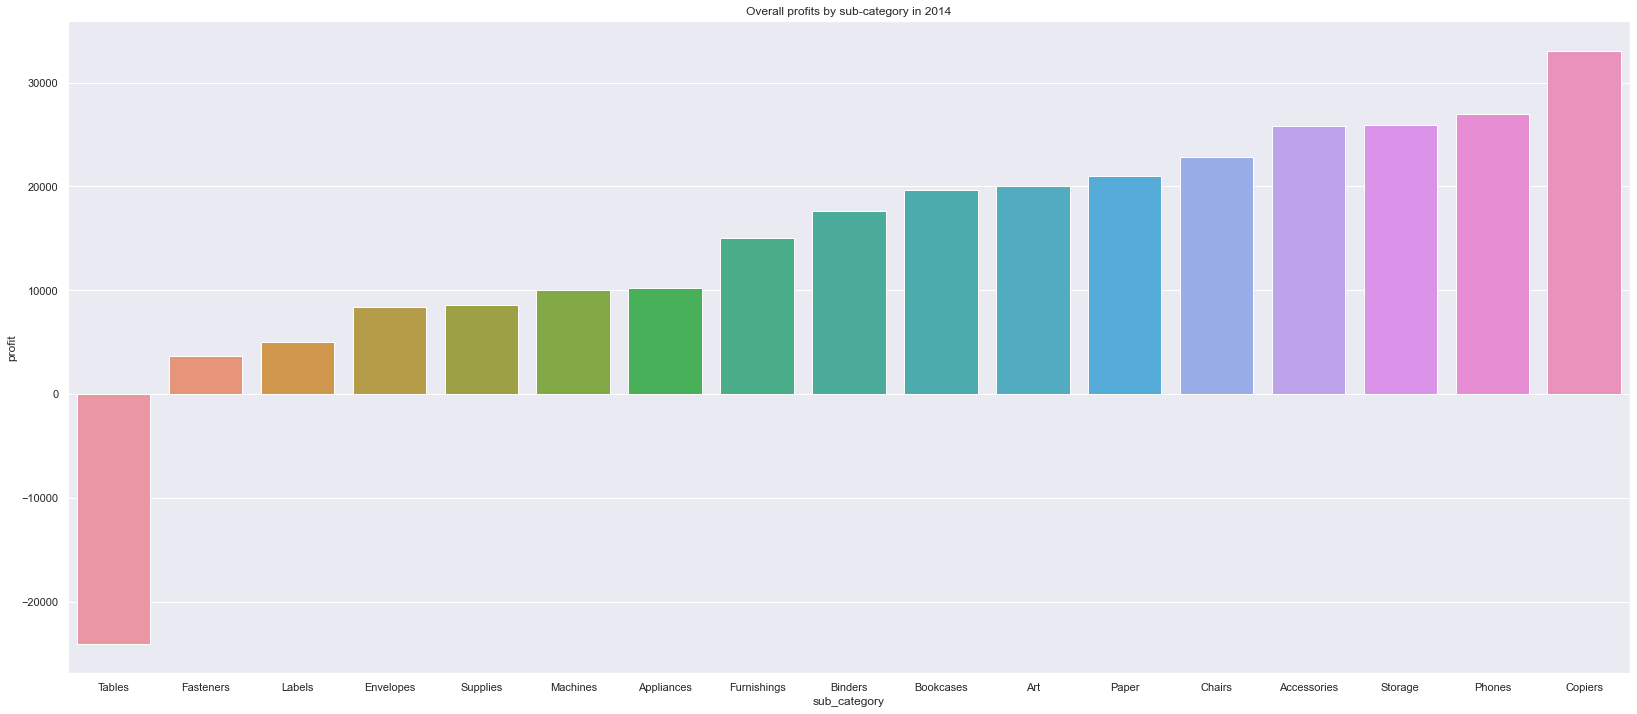

In [137]:
plt.figure(figsize=[28,12])
sns.barplot(data=df33[df33["year"] == 2014].sort_values(by='profit'), x='sub_category', y='profit').set_title("Overall profits by sub-category in 2014")
plt.show()

In [138]:
df34 = df1.groupby(["year","sub_category"])["sales"].sum().reset_index()
df34

,year,sub_category,sales
0,2011,Accessories,92648.0
1,2011,Appliances,68907.0
2,2011,Art,63049.0
3,2011,Binders,60257.0
4,2011,Bookcases,134937.0
...,...,...,...
63,2014,Paper,79627.0
64,2014,Phones,295662.0
65,2014,Storage,312252.0
66,2014,Supplies,74472.0


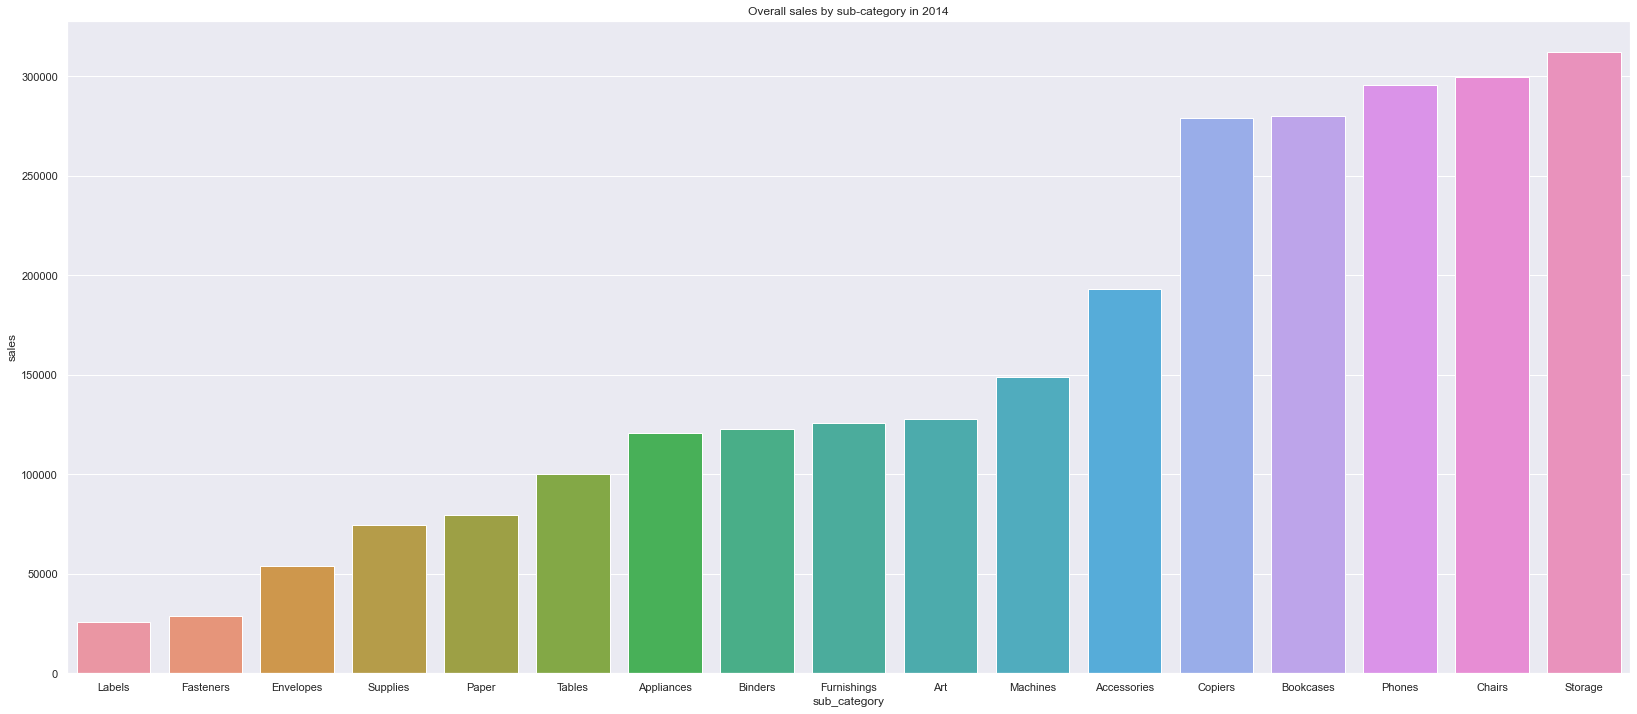

In [139]:
plt.figure(figsize=[28,12])
sns.barplot(data=df34[df34["year"] == 2014].sort_values(by='sales'), x='sub_category', y='sales').set_title("Overall sales by sub-category in 2014")
plt.show()

# Overaqll profit vs sales by sub__category in 2014

In [140]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [141]:
df35 = df33[df33["year"]==2014]["profit"]/df34[df34["year"] == 2014]["sales"]
df35

51    0.133598
52    0.084353
53    0.157384
54    0.143995
55    0.070289
56    0.076379
57    0.118605
58    0.154525
59    0.128578
60    0.119401
61    0.195095
62    0.067641
63    0.263426
64    0.091257
65    0.083009
66    0.115452
67   -0.240017
dtype: float64

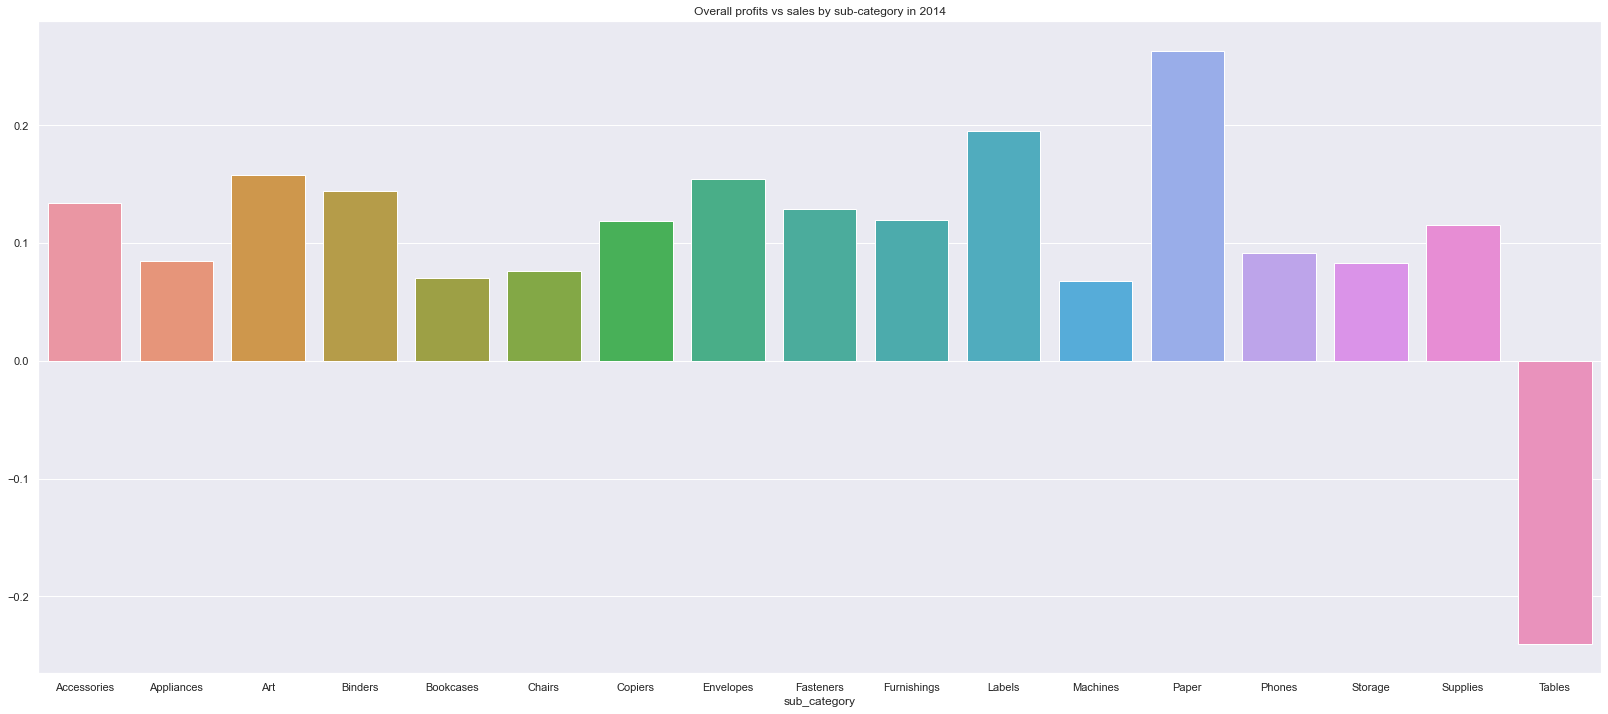

In [142]:
plt.figure(figsize=[28,12])
sns.barplot(x=df34['sub_category'], y=df35).set_title("Overall profits vs sales by sub-category in 2014")
plt.show()

# Most profitable category in sub-category

In [143]:
df1.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [144]:
df36 = df1.groupby(["category","sub_category"])[["profit"]].sum()
df36

profit
category        sub_category             
Furniture       Bookcases     53580.68990
                Chairs        68377.74450
                Furnishings   45012.21550
                Tables       -69921.27200
Office Supplies Appliances    29702.84570
                Art           57842.60850
                Binders       48538.11600
                Envelopes     29601.11630
                Fasteners     11525.42410
                Labels        15010.51200
                Paper         59207.68270
                Storage       74684.47350
                Supplies      23994.54570
Technology      Accessories   81507.85580
                Copiers       85220.44908
                Machines      22674.96240
                Phones        78170.20510

<AxesSubplot:xlabel='category', ylabel='profit'>

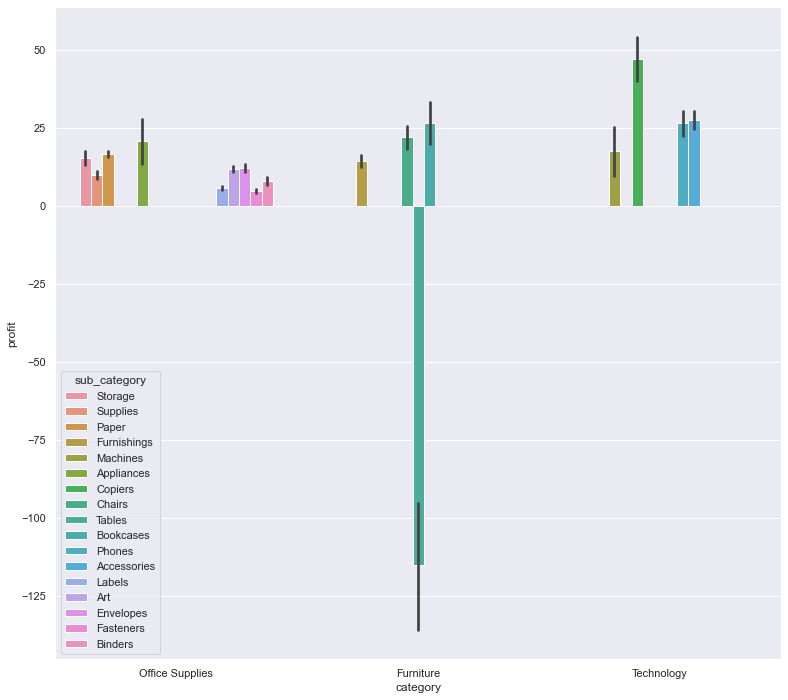

In [145]:
plt.figure(figsize=(13,12))
sns.barplot(data = df36, x = df1["category"],y= df1["profit"],hue = df1["sub_category"])

# Part2 Machine learning

In [146]:
df2 = df1

In [147]:
df2

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14.0,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4.0,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-02-01,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.0,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.0,1,0.0,0.5600,0.20,Medium,2014


In [148]:
df2.isnull().sum().any()

False

In [149]:
df2.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [150]:
df2 = df2.drop(columns = ["order_id","order_date","ship_date","customer_name","product_id","product_name","state","country","year"])

In [151]:
df2

,ship_mode,segment,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Storage,408.0,2,0.0,106.1400,35.46,Medium
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Supplies,120.0,3,0.1,36.0360,9.72,Medium
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,Storage,66.0,4,0.0,29.6400,8.17,High
3,Second Class,Home Office,EU,North,Office Supplies,Paper,45.0,3,0.5,-26.0550,4.82,High
4,Standard Class,Consumer,APAC,Oceania,Furniture,Furnishings,114.0,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,US,West,Office Supplies,Binders,14.0,2,0.2,4.5188,0.89,Medium
51286,Standard Class,Consumer,Africa,Africa,Office Supplies,Binders,4.0,1,0.0,0.4200,0.49,Medium
51287,Second Class,Consumer,LATAM,Central,Office Supplies,Labels,26.0,3,0.0,12.3600,0.35,Medium
51288,Standard Class,Consumer,LATAM,North,Office Supplies,Labels,7.0,1,0.0,0.5600,0.20,Medium


In [152]:
df2["order_priority"].unique()

array(['Medium', 'High', 'Critical', 'Low'], dtype=object)

In [153]:
labelencoder = LabelEncoder()

In [154]:
df2["order_priority"] = labelencoder.fit_transform(df2["order_priority"])

In [155]:
df2

,ship_mode,segment,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority
0,Standard Class,Consumer,Africa,Africa,Office Supplies,Storage,408.0,2,0.0,106.1400,35.46,3
1,Standard Class,Consumer,APAC,Oceania,Office Supplies,Supplies,120.0,3,0.1,36.0360,9.72,3
2,Second Class,Consumer,EMEA,EMEA,Office Supplies,Storage,66.0,4,0.0,29.6400,8.17,1
3,Second Class,Home Office,EU,North,Office Supplies,Paper,45.0,3,0.5,-26.0550,4.82,1
4,Standard Class,Consumer,APAC,Oceania,Furniture,Furnishings,114.0,5,0.1,37.7700,4.70,3
...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,US,West,Office Supplies,Binders,14.0,2,0.2,4.5188,0.89,3
51286,Standard Class,Consumer,Africa,Africa,Office Supplies,Binders,4.0,1,0.0,0.4200,0.49,3
51287,Second Class,Consumer,LATAM,Central,Office Supplies,Labels,26.0,3,0.0,12.3600,0.35,3
51288,Standard Class,Consumer,LATAM,North,Office Supplies,Labels,7.0,1,0.0,0.5600,0.20,3


In [156]:
df2 = pd.get_dummies(df2)

In [157]:
df2.sample(15)

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
22397,336.0,6,0.10,111.7440,37.30,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32276,55.0,1,0.00,26.9304,3.24,3,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
33310,132.0,3,0.00,47.5200,7.83,3,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
47325,87.0,8,0.40,-7.3280,6.20,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21349,35.0,3,0.00,11.9952,3.88,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
43124,880.0,4,0.40,44.0160,61.06,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
49449,49.0,2,0.00,1.4400,10.73,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
14525,13.0,1,0.00,5.0700,0.84,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
39406,54.0,2,0.00,24.3600,7.56,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6521,26.0,7,0.17,3.9921,2.02,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df2.describe()

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,...,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,161.017838,3.350658,0.145722,14.688249,17.593780,2.119503,0.146342,0.052363,0.201171,0.600123,...,0.050041,0.049733,0.065002,0.053555,0.026757,0.072709,0.060625,0.100760,0.049671,0.012474
std,201.092519,2.198216,0.215066,86.825672,28.559365,1.080231,0.353452,0.222761,0.400880,0.489878,...,0.218032,0.217395,0.246532,0.225140,0.161374,0.259660,0.238643,0.301014,0.217267,0.110991
min,0.000000,1.000000,0.000000,-1924.542000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,0.000000,0.000000,2.450000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,77.000000,3.000000,0.000000,8.460000,7.030000,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,208.000000,4.000000,0.200000,31.154400,20.152500,3.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,999.000000,14.000000,0.850000,486.600000,427.100000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
x = df2.drop("order_priority",axis = 1)

In [160]:
x

,sales,quantity,discount,profit,shipping_cost,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Consumer,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,408.0,2,0.0,106.1400,35.46,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,120.0,3,0.1,36.0360,9.72,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,66.0,4,0.0,29.6400,8.17,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3,0.5,-26.0550,4.82,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,114.0,5,0.1,37.7700,4.70,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14.0,2,0.2,4.5188,0.89,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51286,4.0,1,0.0,0.4200,0.49,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
51287,26.0,3,0.0,12.3600,0.35,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
51288,7.0,1,0.0,0.5600,0.20,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [161]:
y = df2["order_priority"]

In [162]:
y

0        3
1        3
2        1
3        1
4        3
        ..
51285    3
51286    3
51287    3
51288    3
51289    3
Name: order_priority, Length: 48660, dtype: int32

# Data Split for traing data and test¶

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state=40)

In [164]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29196, 52), (19464, 52), (29196,), (19464,))

In [165]:
y_test

25041    0
25688    3
11991    1
33176    1
2687     2
        ..
39970    1
7138     3
25105    1
45986    3
29991    1
Name: order_priority, Length: 19464, dtype: int32

# Feature Scalling¶

In [166]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [167]:
x_train

array([[ 1.61098266, -0.61504197, -0.67566805, ..., -0.33683628,
        -0.22835504, -0.11344942],
       [ 2.05504396, -0.15976027, -0.20984457, ...,  2.96880136,
        -0.22835504, -0.11344942],
       [-0.76898635, -1.07032367,  1.65344932, ..., -0.33683628,
        -0.22835504, -0.11344942],
       ...,
       [-0.65921838, -1.07032367, -0.67566805, ..., -0.33683628,
        -0.22835504, -0.11344942],
       [-0.72408127,  0.75080312, -0.67566805, ..., -0.33683628,
        -0.22835504, -0.11344942],
       [-0.03553678,  0.29552142,  2.58509627, ..., -0.33683628,
        -0.22835504, -0.11344942]])

In [168]:
x_test

array([[-0.41497337, -0.61353931, -0.68043682, ..., -0.33157994,
         4.36646074, -0.11078704],
       [-0.64259729, -0.61353931, -0.2167086 , ..., -0.33157994,
        -0.22901843, -0.11078704],
       [-0.66733902, -1.06791603, -0.68043682, ..., -0.33157994,
         4.36646074, -0.11078704],
       ...,
       [ 0.70335283, -0.61353931, -0.68043682, ..., -0.33157994,
        -0.22901843, -0.11078704],
       [-0.26652299, -0.61353931, -0.68043682, ..., -0.33157994,
        -0.22901843, -0.11078704],
       [ 3.91977776,  2.56709777,  1.17447605, ..., -0.33157994,
        -0.22901843, -0.11078704]])

In [169]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [170]:
model.score(x_test, y_test)

0.6580867242087958

In [171]:
model.score(x_train, y_train)

0.6600904233456638

# after remove  outlier

In [172]:
df3 = df2

In [173]:
z_scores = np.abs((df3 - df3.mean()) / df3.std())

In [174]:
z_scores

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,1.228202,0.614434,0.677567,1.053280,0.625582,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,0.263666,0.237875,0.165808,0.280014,0.254039,2.987365,0.228618,0.112391
1,0.203975,0.159519,0.212593,0.245869,0.275699,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,0.263666,0.237875,0.165808,0.280014,0.254039,0.334736,4.374014,0.112391
2,0.472508,0.295395,0.677567,0.172204,0.329972,1.036355,0.414036,0.235065,1.992688,1.225047,...,0.229513,0.228767,0.263666,0.237875,0.165808,0.280014,0.254039,2.987365,0.228618,0.112391
3,0.576938,0.159519,1.647302,0.469253,0.447271,1.036355,0.414036,0.235065,1.992688,1.225047,...,0.229513,0.228767,0.263666,0.237875,0.165808,3.571172,0.254039,0.334736,0.228618,0.112391
4,0.233812,0.750310,0.212593,0.265840,0.451473,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,3.792602,0.237875,0.165808,0.280014,0.254039,0.334736,0.228618,0.112391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.731096,0.614434,0.252380,0.117125,0.584879,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,0.263666,0.237875,0.165808,0.280014,0.254039,0.334736,0.228618,0.112391
51286,0.780824,1.069348,0.677567,0.164332,0.598885,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,0.263666,0.237875,0.165808,0.280014,0.254039,0.334736,0.228618,0.112391
51287,0.671421,0.159519,0.677567,0.026815,0.603787,0.815101,0.414036,0.235065,1.992688,1.225047,...,0.229513,0.228767,0.263666,4.203800,0.165808,0.280014,0.254039,0.334736,0.228618,0.112391
51288,0.765905,1.069348,0.677567,0.162720,0.609039,0.815101,0.414036,0.235065,0.501824,0.816278,...,0.229513,0.228767,0.263666,4.203800,0.165808,0.280014,0.254039,0.334736,0.228618,0.112391


In [175]:
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

In [176]:
outliers

0         True
1         True
2        False
3         True
4         True
         ...  
51285     True
51286     True
51287     True
51288     True
51289     True
Length: 48660, dtype: bool

In [177]:
cleaned_df = df3[~outliers]

In [178]:
cleaned_df

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
2,66.0,4,0.0,29.64,8.17,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
21,52.0,1,0.0,7.77,5.91,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,62.0,2,0.0,8.70,5.16,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
30,140.0,3,0.0,20.88,10.78,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
44,207.0,4,0.0,76.56,20.64,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51234,557.0,3,0.1,216.72,51.79,3,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
51261,59.0,3,0.0,16.44,6.34,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51267,30.0,2,0.5,-9.69,4.46,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51272,23.0,4,0.5,-6.42,3.46,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
x = cleaned_df.drop("order_priority",axis = 1)

In [180]:
x

,sales,quantity,discount,profit,shipping_cost,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Consumer,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
2,66.0,4,0.0,29.64,8.17,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
21,52.0,1,0.0,7.77,5.91,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22,62.0,2,0.0,8.70,5.16,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
30,140.0,3,0.0,20.88,10.78,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
44,207.0,4,0.0,76.56,20.64,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51234,557.0,3,0.1,216.72,51.79,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
51261,59.0,3,0.0,16.44,6.34,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51267,30.0,2,0.5,-9.69,4.46,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51272,23.0,4,0.5,-6.42,3.46,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
y = cleaned_df["order_priority"]

In [182]:
y

2        1
21       1
22       3
30       3
44       3
        ..
51234    3
51261    1
51267    1
51272    1
51279    3
Name: order_priority, Length: 6881, dtype: int32

In [183]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state=40)

In [184]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4128, 52), (2753, 52), (4128,), (2753,))

In [185]:
y_test

35090    1
7657     3
37532    1
4908     1
39452    3
        ..
23866    3
26369    3
11865    3
21789    3
5580     3
Name: order_priority, Length: 2753, dtype: int32

In [186]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [187]:
x_train

array([[ 0.66271247, -0.60359554, -0.63359378, ...,  1.47409087,
         0.        ,  0.        ],
       [ 0.10138497,  0.41506447, -0.63359378, ...,  1.47409087,
         0.        ,  0.        ],
       [-0.54630061, -0.09426553, -0.63359378, ..., -0.67838423,
         0.        ,  0.        ],
       ...,
       [-0.71901677, -1.11292554, -0.63359378, ..., -0.67838423,
         0.        ,  0.        ],
       [-0.39085607, -1.11292554, -0.63359378, ..., -0.67838423,
         0.        ,  0.        ],
       [ 2.61440502, -0.60359554, -0.63359378, ...,  1.47409087,
         0.        ,  0.        ]])

In [188]:
x_test

array([[-0.40037643, -0.58991909, -0.63513045, ..., -0.65981007,
         0.        ,  0.        ],
       [-0.65977498, -0.08065372, -0.63513045, ..., -0.65981007,
         0.        ,  0.        ],
       [-0.44360952,  0.937877  ,  1.55215267, ..., -0.65981007,
         0.        ,  0.        ],
       ...,
       [-0.28797039, -0.08065372, -0.63513045, ..., -0.65981007,
         0.        ,  0.        ],
       [-0.12368465,  0.42861164, -0.63513045, ..., -0.65981007,
         0.        ,  0.        ],
       [ 0.1357139 , -0.58991909, -0.63513045, ..., -0.65981007,
         0.        ,  0.        ]])

In [189]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [190]:
model.score(x_test, y_test)

0.6694515074464221

In [191]:
model.score(x_train, y_train)

0.6790213178294574

In [192]:
df4 = df2

In [193]:
df4

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,408.0,2,0.0,106.1400,35.46,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,120.0,3,0.1,36.0360,9.72,3,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,66.0,4,0.0,29.6400,8.17,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3,0.5,-26.0550,4.82,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,114.0,5,0.1,37.7700,4.70,3,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14.0,2,0.2,4.5188,0.89,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51286,4.0,1,0.0,0.4200,0.49,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51287,26.0,3,0.0,12.3600,0.35,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
51288,7.0,1,0.0,0.5600,0.20,3,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [194]:
def remove_outliers(df4, columns, threshold=3):
    z_scores = np.abs(stats.zscore(df4[columns]))
    outliers_mask = (z_scores > threshold).any(axis=1)
    df_no_outliers = df4[~outliers_mask]
    return df_no_outliers

In [195]:
columns_to_check = ['sales', 'quantity', 'discount',"profit","shipping_cost"]

In [196]:
df_no_outliers = remove_outliers(df4, columns_to_check)

In [197]:
df_no_outliers

,sales,quantity,discount,profit,shipping_cost,order_priority,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,408.0,2,0.0,106.1400,35.46,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,120.0,3,0.1,36.0360,9.72,3,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,66.0,4,0.0,29.6400,8.17,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3,0.5,-26.0550,4.82,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,114.0,5,0.1,37.7700,4.70,3,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14.0,2,0.2,4.5188,0.89,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51286,4.0,1,0.0,0.4200,0.49,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51287,26.0,3,0.0,12.3600,0.35,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
51288,7.0,1,0.0,0.5600,0.20,3,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [198]:
x = df_no_outliers.drop("order_priority",axis = 1)

In [199]:
y = df_no_outliers["order_priority"]

In [200]:
x

,sales,quantity,discount,profit,shipping_cost,ship_mode_First Class,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Consumer,...,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables
0,408.0,2,0.0,106.1400,35.46,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,120.0,3,0.1,36.0360,9.72,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
2,66.0,4,0.0,29.6400,8.17,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,45.0,3,0.5,-26.0550,4.82,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,114.0,5,0.1,37.7700,4.70,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,14.0,2,0.2,4.5188,0.89,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51286,4.0,1,0.0,0.4200,0.49,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
51287,26.0,3,0.0,12.3600,0.35,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
51288,7.0,1,0.0,0.5600,0.20,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [201]:
y


0        3
1        3
2        1
3        1
4        3
        ..
51285    3
51286    3
51287    3
51288    3
51289    3
Name: order_priority, Length: 45220, dtype: int32

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state=40)

In [203]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((27132, 52), (18088, 52), (27132,), (18088,))

In [204]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [205]:
x_train

array([[-0.28765687,  0.96008078, -0.66964854, ..., -0.33522756,
        -0.23166766, -0.08916317],
       [-0.03723694,  0.96008078, -0.66964854, ..., -0.33522756,
        -0.23166766, -0.08916317],
       [-0.59079679,  0.96008078, -0.66964854, ..., -0.33522756,
        -0.23166766, -0.08916317],
       ...,
       [ 0.91831281,  0.96008078, -0.185704  , ..., -0.33522756,
        -0.23166766, -0.08916317],
       [ 1.85409257, -0.08054369, -0.66964854, ...,  2.9830483 ,
        -0.23166766, -0.08916317],
       [ 0.77333285,  2.00070526,  0.54021282, ..., -0.33522756,
        -0.23166766, -0.08916317]])

In [206]:
x_test

array([[-0.68298941, -0.59986396, -0.1900683 , ..., -0.33672207,
        -0.23972604, -0.09565429],
       [-0.01599248, -0.59986396,  1.72996042, ...,  2.96980826,
        -0.23972604, -0.09565429],
       [ 3.96617734, -0.08362363, -0.33407045, ..., -0.33672207,
        -0.23972604, -0.09565429],
       ...,
       [-0.81506801, -1.11610429,  2.68997477, ...,  2.96980826,
        -0.23972604, -0.09565429],
       [-0.73582085, -0.59986396, -0.67007548, ..., -0.33672207,
        -0.23972604, -0.09565429],
       [-0.80846408, -1.11610429,  0.28993888, ..., -0.33672207,
        -0.23972604, -0.09565429]])

In [207]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [208]:
model.score(x_test, y_test)

0.6653029632905794

In [209]:
model.score(x_train, y_train)

0.6672195193867021